<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/EDA_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Originalmente, en el dataset heart-disease from kaggle (https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data) estaban presentes los siguientes datos:


### **Descripción de variables**

- Age: La edad del individuo. +

- Gender: El género del individuo (Masculino o Femenino). +

- Blood Pressure: La presión arterial del individuo (sistólica). +

- Cholesterol Level: El nivel total de colesterol del individuo. +

- Exercise Habits: Los hábitos de ejercicio del individuo (Bajo, Medio, Alto). +

- Smoking: Si el individuo fuma o no (Sí o No). +

- Family Heart Disease: Si hay antecedentes familiares de enfermedad cardíaca (Sí o No). +

- Diabetes: Si el individuo tiene diabetes (Sí o No). +

- BMI: El índice de masa corporal del individuo. +

- High Blood Pressure: Si el individuo tiene presión arterial alta (Sí o No). +

- Low HDL Cholesterol: Si el individuo tiene colesterol HDL bajo (Sí o No). +

- High LDL Cholesterol: Si el individuo tiene colesterol LDL alto (Sí o No). +

- Alcohol Consumption: El nivel de consumo de alcohol del individuo (Ninguno, Bajo, Medio, Alto). +

- Stress Level: El nivel de estrés del individuo (Bajo, Medio, Alto).

- Sleep Hours: La cantidad de horas que duerme el individuo. +

- Sugar Consumption: El nivel de consumo de azúcar del individuo (Bajo, Medio, Alto). +

- Triglyceride Level: El nivel de triglicéridos del individuo. +

- Fasting Blood Sugar: El nivel de glucosa en sangre en ayunas del individuo. +

- CRP Level: El nivel de proteína C reactiva (un marcador de inflamación). +

- Homocysteine Level: El nivel de homocisteína del individuo (un aminoácido que afecta la salud de los vasos sanguíneos). (posiblemente presente en otros períodos de NHANES)

- Heart Disease Status: El estado de la enfermedad cardíaca del individuo (Sí o No).+

### **Nuevo dataset encontrado**

In [140]:
path = "/content/drive/MyDrive/NHANES"
import os
os.listdir(path)


['demographics.csv',
 'laboratory.csv',
 'dietary.csv',
 'examination.csv',
 'questionnaire.csv',
 '2015-2016',
 '2013-2014',
 'df_min.csv']

DATASET: https://www.kaggle.com/datasets/rileyzurrin/national-health-and-nutrition-exam-survey-2017-2018

Los datos se obtienen de la Encuesta Nacional de Examen de Salud y Nutrición (NHANES) en EEUU.

NHANES: https://wwwn.cdc.gov/nchs/nhanes/


Los datos tomados para las siguientes pruebas son del período 2017-2018. Se podría analizar la posibilidad de tomar más períodos, siempre y cuando en esos periodos se hayan recolectado todos los datos necesarios para el proyecto. También en caso de que hubiera muchos faltantes en el período 2017-2018.

Los datos se cargan em archivos por separado. Son datos demográficos, de laboratorio, mediciones físicas, exámenes médicos y de alimentación de distintos pacientes indentificados con un ID llamado SEQN.

In [141]:
#Librerias
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [142]:
df_demo = pd.read_csv(f"{path}/demographics.csv")
df_lab  = pd.read_csv(f"{path}/laboratory.csv")
df_exam = pd.read_csv(f"{path}/examination.csv")
df_diet = pd.read_csv(f"{path}/dietary.csv")
df_quest= pd.read_csv(f"{path}/questionnaire.csv")


In [143]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, "SEQN" in df.columns)


demo True
lab True
exam True
diet True
quest True


In [144]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df.shape)


demo (9254, 46)
lab (8366, 386)
exam (8704, 490)
diet (9254, 362)
quest (9254, 956)


In [145]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df["SEQN"].nunique(), "personas únicas")


demo 9254 personas únicas
lab 8366 personas únicas
exam 8704 personas únicas
diet 9254 personas únicas
quest 9254 personas únicas


In [146]:
df = df_demo.merge(df_lab,  on="SEQN", how="left")
df = df.merge(df_exam, on="SEQN", how="left")
df = df.merge(df_diet, on="SEQN", how="left")
df = df.merge(df_quest,on="SEQN", how="left")

df.shape


(9254, 2236)

In [147]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190,WHQ200,WHQ030M,WHQ500,WHQ520
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,150.0,130.0,63.0,170.0,62.0,2.0,NaN,NaN,NaN,NaN
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,NaN,NaN,NaN,150.0,17.0,2.0,NaN,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0


el dataset posee 2236 columnas. Las variables estan etiquetadas por codigos cuya descripcion se encuentra en la documentacion oficial del nhanes.

In [148]:
df["SEQN"].nunique()


9254

In [149]:
df.isnull().mean().sort_values(ascending=False).head(30)


,0
BMIHEAD,1.000000
OSQ040CE,0.999892
HIQ031AA,0.999892
OSD030CE,0.999892
OSD050CC,0.999892
OSD050CE,0.999892
MCQ230D,0.999892
OSQ100J,0.999892
OSD110J,0.999892
SMQ665B,0.999892


primera limpieza: se eliminan columnas con faltantes de mas del 80%

In [150]:
threshold = 0.80
missing_ratio = df.isnull().mean()

cols_to_drop = missing_ratio[missing_ratio > threshold].index
len(cols_to_drop)

801

In [151]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape


(9254, 1435)

In [152]:
df_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHQ040,WHD050,WHQ070,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190
0,93703.0,10.0,2.0,2.0,2.0,5.0,6.0,2.0,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,3.0,3.0,1.0,33.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,10.0,2.0,2.0,66.0,4.0,4.0,2.0,NaN,2.0,...,3.0,165.0,2.0,4.0,150.0,130.0,63.0,170.0,62.0,2.0
3,93706.0,10.0,2.0,1.0,18.0,5.0,6.0,2.0,222.0,2.0,...,3.0,145.0,2.0,5.0,NaN,NaN,NaN,150.0,17.0,2.0
4,93707.0,10.0,2.0,1.0,13.0,5.0,7.0,2.0,158.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
"SEQN" in df_clean.columns


True

mayores de 18

In [154]:
df_clean = df_clean[df_clean["RIDAGEYR"] >= 18]
df_clean.shape


(5856, 1435)

Armado de target

Se toman 4 valores:

"MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?"

"MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?"

"MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?"

"MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?"

In [155]:
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

valores de esas columnas.

Significados:

1- si
2 - no
7 - no quizo contestar
9 - no sabe


In [156]:
for col in cvd_cols:
    print(f"Valores en {col}:")
    print(df_clean[col].value_counts(dropna=False))
    print("-"*30)

Valores en MCQ160B:
MCQ160B
2.0    5351
NaN     287
1.0     201
9.0      17
Name: count, dtype: int64
------------------------------
Valores en MCQ160C:
MCQ160C
2.0    5288
NaN     287
1.0     265
9.0      16
Name: count, dtype: int64
------------------------------
Valores en MCQ160D:
MCQ160D
2.0    5378
NaN     287
1.0     161
9.0      30
Name: count, dtype: int64
------------------------------
Valores en MCQ160E:
MCQ160E
2.0    5289
NaN     287
1.0     270
9.0      10
Name: count, dtype: int64
------------------------------


como se ve, algunos encuestados no saben si tienen algunas de esas patologias. Son muy pocos. por lo tanto, los elimino.Tambien se eliminan los que tienen faltantes, ya que al tratarse del target,se necesitan datos confiables.

In [157]:
import numpy as np

# Reemplazar 9 por NaN (no sabe)
df_clean[cvd_cols] = df_clean[cvd_cols].replace(9, np.nan)

# Eliminar filas donde no hay info en ninguna columna de CVD
df_clean = df_clean[df_clean[cvd_cols].notna().any(axis=1)]

# Crear target binario
df_clean["alto_riesgo"] = (df_clean[cvd_cols] == 1).any(axis=1).astype(int) ## si respondió si en alguna de las variables, se codifica como que si posee enfermedad cardiovascular

# Verificar distribución
print(df_clean["alto_riesgo"].value_counts())



alto_riesgo
0    5041
1     527
Name: count, dtype: int64


In [158]:
df_clean.shape

(5568, 1436)

Aún se tiene una buena cantidad de datos

In [159]:
df_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHD050,WHQ070,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190,alto_riesgo
2,93705.0,10.0,2.0,2.0,66.0,4.0,4.0,2.0,NaN,2.0,...,165.0,2.0,4.0,150.0,130.0,63.0,170.0,62.0,2.0,0
5,93708.0,10.0,2.0,2.0,66.0,5.0,6.0,2.0,NaN,2.0,...,118.0,2.0,5.0,118.0,100.0,60.0,120.0,40.0,2.0,0
6,93709.0,10.0,2.0,2.0,75.0,4.0,4.0,1.0,NaN,2.0,...,190.0,2.0,3.0,170.0,160.0,62.0,200.0,50.0,2.0,0
8,93711.0,10.0,2.0,1.0,56.0,5.0,6.0,2.0,NaN,2.0,...,142.0,2.0,5.0,142.0,148.0,69.0,152.0,33.0,2.0,0
10,93713.0,10.0,2.0,1.0,67.0,3.0,3.0,1.0,NaN,1.0,...,168.0,2.0,5.0,190.0,170.0,72.0,195.0,45.0,2.0,0


In [160]:
df_clean["alto_riesgo"].value_counts(normalize=True)


,proportion
alto_riesgo,
0,0.905352
1,0.094648


In [161]:
import pandas as pd

# Diccionario con todas las variables y su significado
nhanes_vars_dict = {
    "SEQN": "Identificador único del participante",
    "RIDSTATR": "Entrevista solo online o con estudios presenciales",
    "RIDAGEYR": "Edad del participante (años)", # numerica
    "RIAGENDR": "Género (1=Hombre, 2=Mujer)", # binaria
    "BPXSY1": "Presión sistólica, medición 1 (mmHg)", # numerica continua
    "BPXSY2": "Presión sistólica, medición 2 (mmHg)", # numerica continua
    "BPXSY3": "Presión sistólica, medición 3 (mmHg)", # numerica continua
    # "BPXSY4": "Presión sistólica, medición 4 (mmHg)",   YA NO EXISTE EN ESTE PUNTO
    "LBXTC": "Colesterol total (mg/dL)",
    "LBDHDD": "Colesterol HDL (mg/dL)",
    "LBDLDL": "Colesterol LDL (mg/dL)",
    "LBXTR": "Triglicéridos (mg/dL)",
    "LBXGLU": "Glucosa en ayunas (mg/dL)",
    "LBXHSCRP": "Proteína C reactiva de alta sensibilidad (hs-CRP) (mg/dL, marcador de inflamación)",
    ## ------ Para target -----------
    "MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?",
    "MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?",
    "MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?",
    "MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?",
    ## ------------------------------
    "MCQ300A": "Pariente con enfermedad cardíaca (si ha tenido nu ataque cardíaco o angina)",
    "MCQ300B": "Pariente con asma",
    "MCQ300C": "Pariente con diabetes",
    "DIQ010": "Diabetes declarada por médico",
    "BPQ020": "Diagnóstico de presión arterial alta",
    "BMXBMI": "Índice de masa corporal (kg/m²)",
    "SMQ020": "Fumador en algún momento de la vida",
    "SMQ040": "Fuma actualmente",
    "PAQ605": "Actividad física: caminar/bici últimos 7 días",
    "PAQ620": "Actividad física moderada últimos 7 días",
    "PAQ635": "Actividad física vigorosa últimos 7 días",
    "PAQ650": "Tiempo sentado promedio diario",
    "SLD012": "Horas de sueño promedio por noche",
    "DPQ010": "Pregunta 1 escala depresión -anhedonia",
    "DPQ020": "Pregunta 2 escala depresión",
    # "DPQ030": "Pregunta 3 escala depresión",
    # "DPQ040": "Pregunta 4 escala depresión",
    # "DPQ050": "Pregunta 5 escala depresión",
    # "DPQ060": "Pregunta 6 escala depresión",
    # "DPQ070": "Pregunta 7 escala depresión",
    # "DPQ080": "Pregunta 8 escala depresión",
    # "DPQ090": "Pregunta 9 escala depresión",
    # "ALD020": "A lo largo de tu vida, ¿cuántos días has consumido al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    # "ALD030": "Durante los últimos 30 días, ¿cuántos días consumiste al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    "ALQ130": "Durante los últimos 12 meses, en los días que {usted/SP} consumió bebidas alcohólicas, ¿cuántas copas tomó en promedio? Por copa, se refiere a una cerveza de 355 ml, una copa de vino de 145 ml o una onza y media de licor.",
    # "DR1TSUGR": "Consumo de azúcar total del día (gramos)",
    # agregados despues
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "Recodificación de información reportada sobre raza y origen hispano, con categoría de asiático no hispano",
    "BPXDI1" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI2" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI3" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXPULS": "Pulso ¿regular o irregular? (1 -regular, 2- irregular)", # numerica binaria
    "LBXGH" :	"Glicohemoglobina (%)", # numerica
    "LBXHGB":  "Hemoglobina (g/dL)",
    "LBXRDW": "Ancho de distribución de glóbulos rojos (%)",
    "LBXSCR": "Creatinina, suero refrigerado (mg/dL)",
    # "PAQ610": "(Días por semana de actividad intensa en el trabajo)", faltantes
    # AQ625 (días de actividad moderada en el trabajo)
    # AQ640 (días caminando/bicicleta para transporte)
    # PAQ655 (días actividad deportiva vigorosa)
    # "PAQ665": "(actividad deportiva moderada, sí/no)", #se elige paq670
    "PAQ670": "(días actividad deportiva moderada)",
    "DIQ160": "(prediabetes / glucosa alterada)",
    "MCQ160F": "(alguna vez ACV)",
    "BPQ080": "Diagnóstico de colesterol alto",
    # "BPQ100D":"cumplimiento de medicación para colesterol",
    "BPQ090D": "Told to take prescriptn for cholesterol",
    "KIQ022" : "¿Alguna vez le dijeron que tiene riñones débiles o fallando?",
    "ALQ121": "Durante los últimos 12 meses, ¿con qué frecuencia consumiste cualquier tipo de bebida alcohólica? Indica cuántos días por semana, por mes o por año.",
    "ALQ142": "Durante los últimos 12 meses, ¿con qué frecuencia tomaste {DISPLAY NUMBER} o más bebidas alcohólicas en un solo día? Indica cuántos días por semana, por mes o por año.",
    "ALQ170": "Considerando todos los tipos de bebidas alcohólicas, durante los últimos 30 días, ¿cuántas veces tomaste {4/5} o más bebidas en una ocasión?",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2",
    "LBXSGL": "glucosa_gen",
    "LBDLDNSI": "colesterol_total_2"




# ALD030 – Durante los últimos 30 días, ¿en cuántos días consumiste al menos una bebida alcohólica?


# ALD040 – Durante los últimos 30 días, ¿en cuántos días consumiste {'4' mujeres, '5' hombres - mostrar número} o más bebidas alcohólicas seguidas, es decir, en un par de horas?

}
#" opcionales
# LBXIN -	Insulina (uU/mL)
# LBXFER - Ferritina (ng/mL)
# "URXCOTT" : "Cotinina (ng/mL)" #si, no hay respuesta clara de tabaquismo
# CDQ001 (Dolor/molestia en el pecho alguna vez) → Opcional / complementaria
# CDQ002 (Dolor al subir cuestas o apurarse) → Opcional / complementaria
# CDQ003 (Dolor al caminar a paso normal) → Opcional / complementaria
# CDQ008 (Dolor intenso >30 min en pecho) → Opcional / relevante si querés preinfarto


In [162]:
variable = 'LBXHSCRP'

if variable in df_clean.columns:
    print("La variable existe")
    print(df_clean[variable].unique())
else:
    print("La variable NO existe")

La variable existe
[ 2.72  1.83  6.94 ...  5.63 14.96  9.57]


In [163]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Lista de variables que ppropuestas
selected_vars = list(nhanes_vars_dict.keys())

# Ver cuáles existen realmente en df_clean
existing_vars = [var for var in selected_vars if var in df_clean.columns]


# Features = todas las columnas existentes menos las de CVD y el target ya creado
feature_cols = [col for col in existing_vars if col not in cvd_cols and col != "alto_riesgo"]

print(f"Número de features que vamos a usar: {len(feature_cols)}")
print(feature_cols)


Número de features que vamos a usar: 53
['SEQN', 'RIDSTATR', 'RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'LBXTC', 'LBDHDD', 'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP', 'MCQ300A', 'MCQ300B', 'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020', 'SMQ040', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010', 'DPQ020', 'ALQ130', 'RIDRETH3', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXPULS', 'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670', 'DIQ160', 'MCQ160F', 'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142', 'ALQ170', 'LBDSTRSI', 'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI', 'LBXSGL', 'LBDLDNSI']


In [164]:
# Variables que se eliminaron
removed_vars = [var for var in selected_vars if var not in existing_vars]

print(f"Se eliminaron {len(removed_vars)} variables:")
print(removed_vars)


Se eliminaron 0 variables:
[]


In [165]:
print(df_clean.columns.tolist())


['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCS

In [166]:
# df_clean = df_clean.drop(columns=["SEQN"])


In [167]:
print(df_clean.columns.tolist())

['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCS

In [168]:
print("Nombre de las variables:")

for i, col in enumerate(df_clean.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. SEQN
2. SDDSRVYR
3. RIDSTATR
4. RIAGENDR
5. RIDAGEYR
6. RIDRETH1
7. RIDRETH3
8. RIDEXMON
9. RIDEXAGM
10. DMQMILIZ
11. DMDBORN4
12. DMDCITZN
13. DMDYRSUS
14. DMDEDUC3
15. DMDEDUC2
16. DMDMARTL
17. SIALANG
18. SIAPROXY
19. SIAINTRP
20. FIALANG
21. FIAPROXY
22. FIAINTRP
23. MIALANG
24. MIAPROXY
25. MIAINTRP
26. AIALANGA
27. DMDHHSIZ
28. DMDFMSIZ
29. DMDHHSZA
30. DMDHHSZB
31. DMDHHSZE
32. DMDHRGND
33. DMDHRAGZ
34. DMDHREDZ
35. DMDHRMAZ
36. DMDHSEDZ
37. WTINT2YR
38. WTMEC2YR
39. SDMVPSU
40. SDMVSTRA
41. INDHHIN2
42. INDFMIN2
43. INDFMPIR
44. URXUMA
45. URXUMS
46. URXUCR
47. URXCRS
48. URDACT
49. WTSSGP2Y
50. WTSA2YR
51. URXUAS
52. URXUAS3
53. URXUAS5
54. URXUAB
55. URXUAC
56. URXUDMA
57. URXUMMA
58. URDUMMAL
59. LBDHDD
60. LBDHDDSI
61. WTSAF2YR
62. LBXTR
63. LBDTRSI
64. LBDLDL
65. LBDLDLSI
66. LBDLDLM
67. LBDLDMSI
68. LBDLDLN
69. LBDLDNSI
70. LBXTC
71. LBDTCSI
72. URXUCM
73. LBXBCR
74. LBDBCRSI
75. LBXBCO
76. LBDBCOSI
77. LBXWBCSI
78. LBXLYPCT
79. LBXMOPCT
80. LB

In [169]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Crear un DataFrame mínimo que tenga solo las features y el target
df_min = df_clean[feature_cols + ["alto_riesgo"]]

# Verificar
print(df_min.shape)
print(df_min.columns)


(5568, 54)
Index(['SEQN', 'RIDSTATR', 'RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2',
       'BPXSY3', 'LBXTC', 'LBDHDD', 'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP',
       'MCQ300A', 'MCQ300B', 'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020',
       'SMQ040', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010',
       'DPQ020', 'ALQ130', 'RIDRETH3', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXPULS',
       'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670', 'DIQ160', 'MCQ160F',
       'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142', 'ALQ170', 'LBDSTRSI',
       'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI', 'LBXSGL', 'LBDLDNSI',
       'alto_riesgo'],
      dtype='object')


In [170]:
# Crear diccionario con los nombres cortos que corresponden solo a tus features
short_names_dict = {
    "SEQN": "id_paciente",
    "RIDSTATR": "tipo_entrevista",
    "RIDAGEYR": "edad",
    "RIAGENDR": "genero",
    "BPXSY1": "presion_sis_1",
    "BPXSY2": "presion_sis_2",
    "BPXSY3": "presion_sis_3",
    "LBXTC": "colesterol_total",
    "LBDHDD": "hdl",
    "LBDLDL": "ldl",
    "LBXTR": "trigliceridos",
    "LBXGLU": "glucosa",
    "LBXHSCRP": "proteina_c_reactiva",
    "MCQ300A": "fam_cardio",
    "MCQ300B": "fam_asma",
    "MCQ300C": "fam_diabetes",
    "DIQ010": "diabetes",
    "BPQ020": "hipertension",
    "BMXBMI": "bmi",
    "SMQ020": "fumador_hist",
    "SMQ040": "fumador_actual",
    "PAQ605": "act_caminar_bici",
    "PAQ620": "act_moderada",
    "PAQ635": "act_vigorosa",
    "PAQ650": "tiempo_sentado",
    "SLD012": "horas_suenio",
    "DPQ010": "anhedonia",
    "DPQ020": "deprimido_decaido",
    # "DPQ030": "depresion_3",
    # "DPQ040": "depresion_4",
    # "DPQ050": "depresion_5",
    # "DPQ060": "depresion_6",
    # "DPQ070": "depresion_7",
    # "DPQ080": "depresion_8",
    # "DPQ090": "depresion_9",
    "ALQ130": "alcohol_promedio",
    # "DR1TSUGR": "azucar_total_dia",
    #
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "raza_origen",
    "BPXDI1" : "presion_dis_1",
    "BPXDI2" : "presion_dis_2",
    "BPXDI3" : "presion_dis_3",
    "BPXPULS": "pulso", # numerica binaria
    "LBXGH" :	"glicohemoglobina", # numerica
    "LBXHGB":  "hemoglobina",
    "LBXRDW": "ancho_distribucion_globulos",
    "LBXSCR": "creatinina",
    # "PAQ665": "actividad_deportiva moderada, sí/no)",
    "PAQ670": "actividad_deportiva_moderada_x_semana",
    "DIQ160": "prediabetes_glucosa_alterada",
    "MCQ160F": "ACV",
    "BPQ080": "colesterol_alto",
    "BPQ090D": "medicacion_colesterol",
    "KIQ022" : "riñones_debiles_fallando",
    "ALQ121": "consumo_alcohol_ultimo_año",
    "ALQ142": "consumo_excesivo_alcohol_ultimo_año",
    "ALQ170": "veces_consumo_excesivo_alcohol_30_dias",
    "LBXHSCRP":'proteina_c',
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2",
    "LBXSGL": "glucosa_gen",
    "LBDLDNSI": "colesterol_total_2"
}


# Filtrar short_names_dict para quedarnos solo con columnas que existen en df_min
# short_names_dict_filtered = {k: v for k, v in short_names_dict.items() if k in df_min.columns}

# Renombrar columnas en df_min
df_min = df_min.rename(columns=short_names_dict)

# Actualizar lista de features con los nombres cortos
feature_cols = [short_names_dict[col] for col in feature_cols if col in short_names_dict]

# Verificar
print("Nuevos nombres de features:")
print(feature_cols)
print("Columnas del DataFrame mínimo renombrado:")
print(df_min.columns)



Nuevos nombres de features:
['id_paciente', 'tipo_entrevista', 'edad', 'genero', 'presion_sis_1', 'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl', 'trigliceridos', 'glucosa', 'proteina_c', 'fam_cardio', 'fam_asma', 'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist', 'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa', 'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido', 'alcohol_promedio', 'raza_origen', 'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso', 'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina', 'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada', 'ACV', 'colesterol_alto', 'medicacion_colesterol', 'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año', 'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2', 'glucosa_2', 'ldl_2', 'glucosa_gen', 'colesterol_total_2']
Columnas del DataFrame mínimo renomb

In [171]:
print(df_min.columns)



Index(['id_paciente', 'tipo_entrevista', 'edad', 'genero', 'presion_sis_1',
       'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl',
       'trigliceridos', 'glucosa', 'proteina_c', 'fam_cardio', 'fam_asma',
       'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist',
       'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa',
       'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido',
       'alcohol_promedio', 'raza_origen', 'presion_dis_1', 'presion_dis_2',
       'presion_dis_3', 'pulso', 'glicohemoglobina', 'hemoglobina',
       'ancho_distribucion_globulos', 'creatinina',
       'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada',
       'ACV', 'colesterol_alto', 'medicacion_colesterol',
       'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año',
       'consumo_excesivo_alcohol_ultimo_año',
       'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2',
       'glucosa_2', 'ldl_2

In [172]:
import pandas as pd

# Lista de variables actuales en df_subset
existing_vars = list(df_min.columns)

# Crear DataFrame con % de faltantes
df_missing = pd.DataFrame({
    "Código NHANES": existing_vars,
    "Significado": [nhanes_vars_dict.get(col, "Variable sin descripción") for col in existing_vars],
    "% Faltantes": [df_min[col].isnull().mean()*100 for col in existing_vars]
})

# Ordenar por % de faltantes
df_missing = df_missing.sort_values("% Faltantes", ascending=False)

# Mostrar
df_missing

,Código NHANES,Significado,% Faltantes
38,actividad_deportiva_moderada_x_semana,Variable sin descripción,60.632184
20,fumador_actual,Variable sin descripción,58.081897
50,ldl_2,Variable sin descripción,57.471264
9,ldl,Variable sin descripción,57.471264
52,colesterol_total_2,Variable sin descripción,57.147989
10,trigliceridos,Variable sin descripción,57.022270
49,glucosa_2,Variable sin descripción,56.267960
11,glucosa,Variable sin descripción,56.267960
46,veces_consumo_excesivo_alcohol_30_dias,Variable sin descripción,40.211925
28,alcohol_promedio,Variable sin descripción,40.032328


In [173]:
print("Nombre de las variables:")

for i, col in enumerate(df_min.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. id_paciente
2. tipo_entrevista
3. edad
4. genero
5. presion_sis_1
6. presion_sis_2
7. presion_sis_3
8. colesterol_total
9. hdl
10. ldl
11. trigliceridos
12. glucosa
13. proteina_c
14. fam_cardio
15. fam_asma
16. fam_diabetes
17. diabetes
18. hipertension
19. bmi
20. fumador_hist
21. fumador_actual
22. act_caminar_bici
23. act_moderada
24. act_vigorosa
25. tiempo_sentado
26. horas_suenio
27. anhedonia
28. deprimido_decaido
29. alcohol_promedio
30. raza_origen
31. presion_dis_1
32. presion_dis_2
33. presion_dis_3
34. pulso
35. glicohemoglobina
36. hemoglobina
37. ancho_distribucion_globulos
38. creatinina
39. actividad_deportiva_moderada_x_semana
40. prediabetes_glucosa_alterada
41. ACV
42. colesterol_alto
43. medicacion_colesterol
44. riñones_debiles_fallando
45. consumo_alcohol_ultimo_año
46. consumo_excesivo_alcohol_ultimo_año
47. veces_consumo_excesivo_alcohol_30_dias
48. trigliceridos_2
49. hdl_2
50. glucosa_2
51. ldl_2
52. glucosa_gen
53. colesterol_tota

### **Tipos de datos de cada variable**


In [174]:
df_min.dtypes

,0
id_paciente,float64
tipo_entrevista,float64
edad,float64
genero,float64
presion_sis_1,float64
presion_sis_2,float64
presion_sis_3,float64
colesterol_total,float64
hdl,float64
ldl,float64


todos son float. En el caso de que se traten de cuestionarios, se encuentran ya con valores numericos de acuerdo a lo que respondió el paciente.

### **Comprobamos si existen observaciones duplicadas**

Se comprueba si hay duplicados por las dudas se encuentre repetidos algunos pacientes.

In [175]:
print("Cantidad de datos duplicados:", df_min.duplicated().sum())

Cantidad de datos duplicados: 0


## **Faltantes**

### ***Consideraciones***

En este dataset en particular, se puede producir faltantes por los siguientes motivos:

- Para algunas variables, (trigliceridos, glucosa, hdl, etc), puede suceder que la medición se encuentre en 2 unidades diferentes. Esto en algunos casos puede producir faltantes porque lo que se hace es realizar el estudio usando un tipo de unidad y luego realizar la conversión. Se van a tomar las unidades que usualmente se utilizan en Argentina. En caso de muchos faltantes, se realiza la conversión tomando el valor de la otra columna (el factor de conversión para cada una se encuentra en la documentación) y así disminuir la cantidad de faltantes.

- Para el caso por ejemplo de la glucosa, se pueden producir faltantes para aquellos pacientes, o que no fueron seleccionados para realizarse exámenes de laboratorio, o que dentro de los que se realizaron exámenes, una porción fue seleccionada para realizarselos en un determinado momento del día. Siguiendo con el ejemplo de la glucosa, existe una variable ( LBXGLU ), que representa la glucosa controlada en ayunas. Luego existe otra ( LBXSGL ) que es la medición que se tomaron por ejemplo durante la tarde y con una cierto tiempo de no ingesta de alimentos. Esta medición se la hace de forma general. Se podría usar ambas para crear una variable glucosa, pero agregando una columna adicional que indique si el análisis se realizó en ayunas o no. A pesar de que no sea glucosa en ayunas, puede aportar información sobre el funcionamiento del metabolismo del paciente.

- Tambien puede suceder que la entrevista la haya realizado de manera online, por lo que no va a tener examenes de laboratorio.

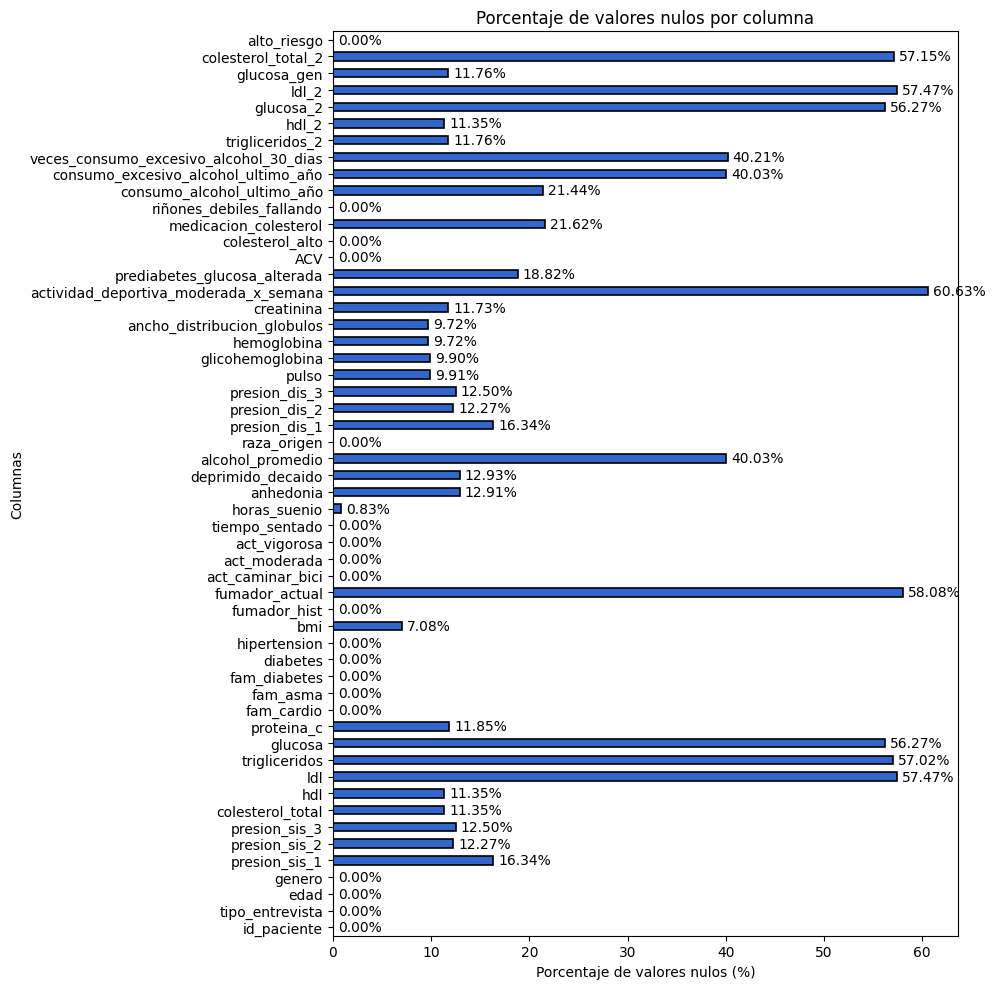

In [176]:
porcentaje_nulos = df_min.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [177]:
if 'LBXSGL' in df_clean.columns:
    print(f"¡Encontramos Glucosa General! Faltantes: {df_clean['LBXSGL'].isnull().sum()}")
    # Comparar con la de ayuno
    print(f"Faltantes en Glucosa Ayuno (LBXGLU): {df_clean['LBXGLU'].isnull().sum()}")
else:
    print("La variable LBXSGL no está en este archivo.")

¡Encontramos Glucosa General! Faltantes: 655
Faltantes en Glucosa Ayuno (LBXGLU): 3133


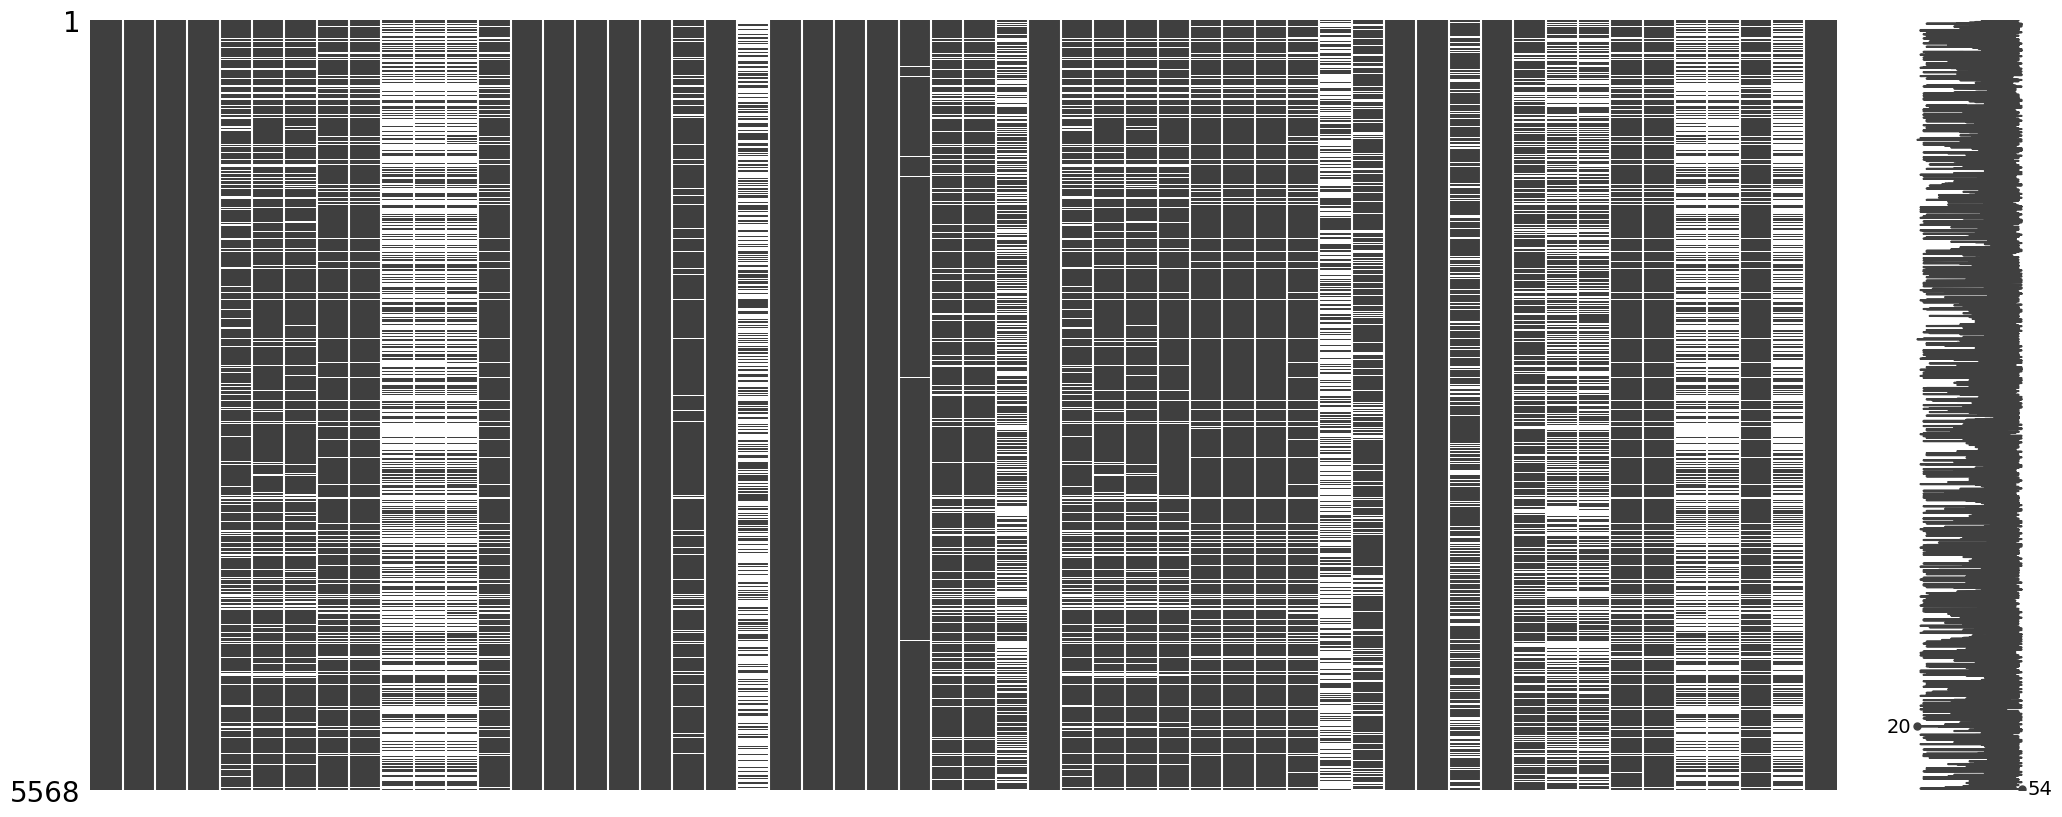

In [178]:
msno.matrix(df_min)
plt.show()

se pueden analizar algunas dependecias en los faltantes. Se analiza cada uno

Nombre de las variables con faltantes:
4. colesterol_total
5. hdl
6. ldl
7. trigliceridos
8. glucosa
9. hs_crp
10. bmi
11. fumador_actual
12. horas_suenio
13. anhedonia
14. deprimido_decaido
15. alcohol_promedio
16. azucar_total_dia
20. pulso
21. glicohemoglobina
22. hemoglobina
23. ancho_distribucion_globulos
24. creatinina
25. actividad_deportiva_moderada_x_semana
26. prediabetes_glucosa_alterada
27. medicacion_colesterol
28. consumo_alcohol_ultimo_año
29. consumo_excesivo_alcohol_ultimo_año
30. veces_consumo_excesivo_alcohol_30_dias

### **Faltantes presión**

<Figure size 1000x600 with 0 Axes>

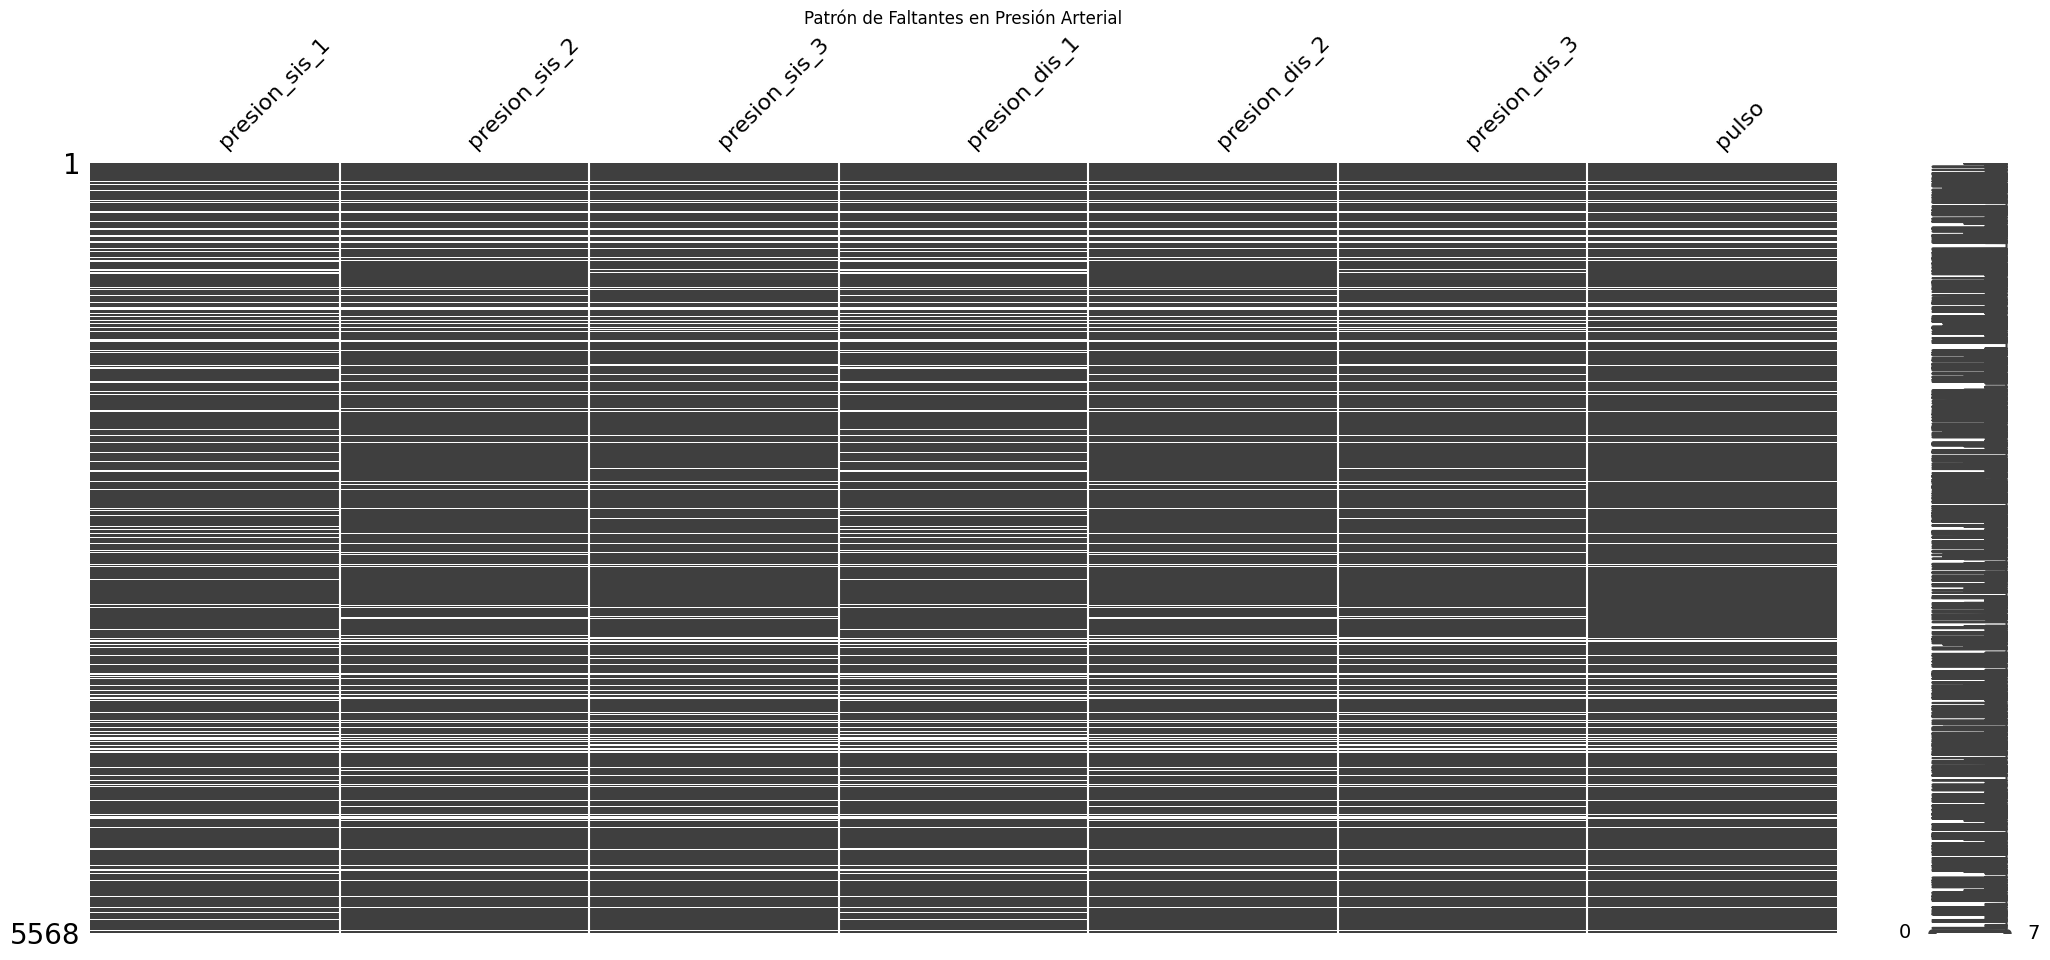

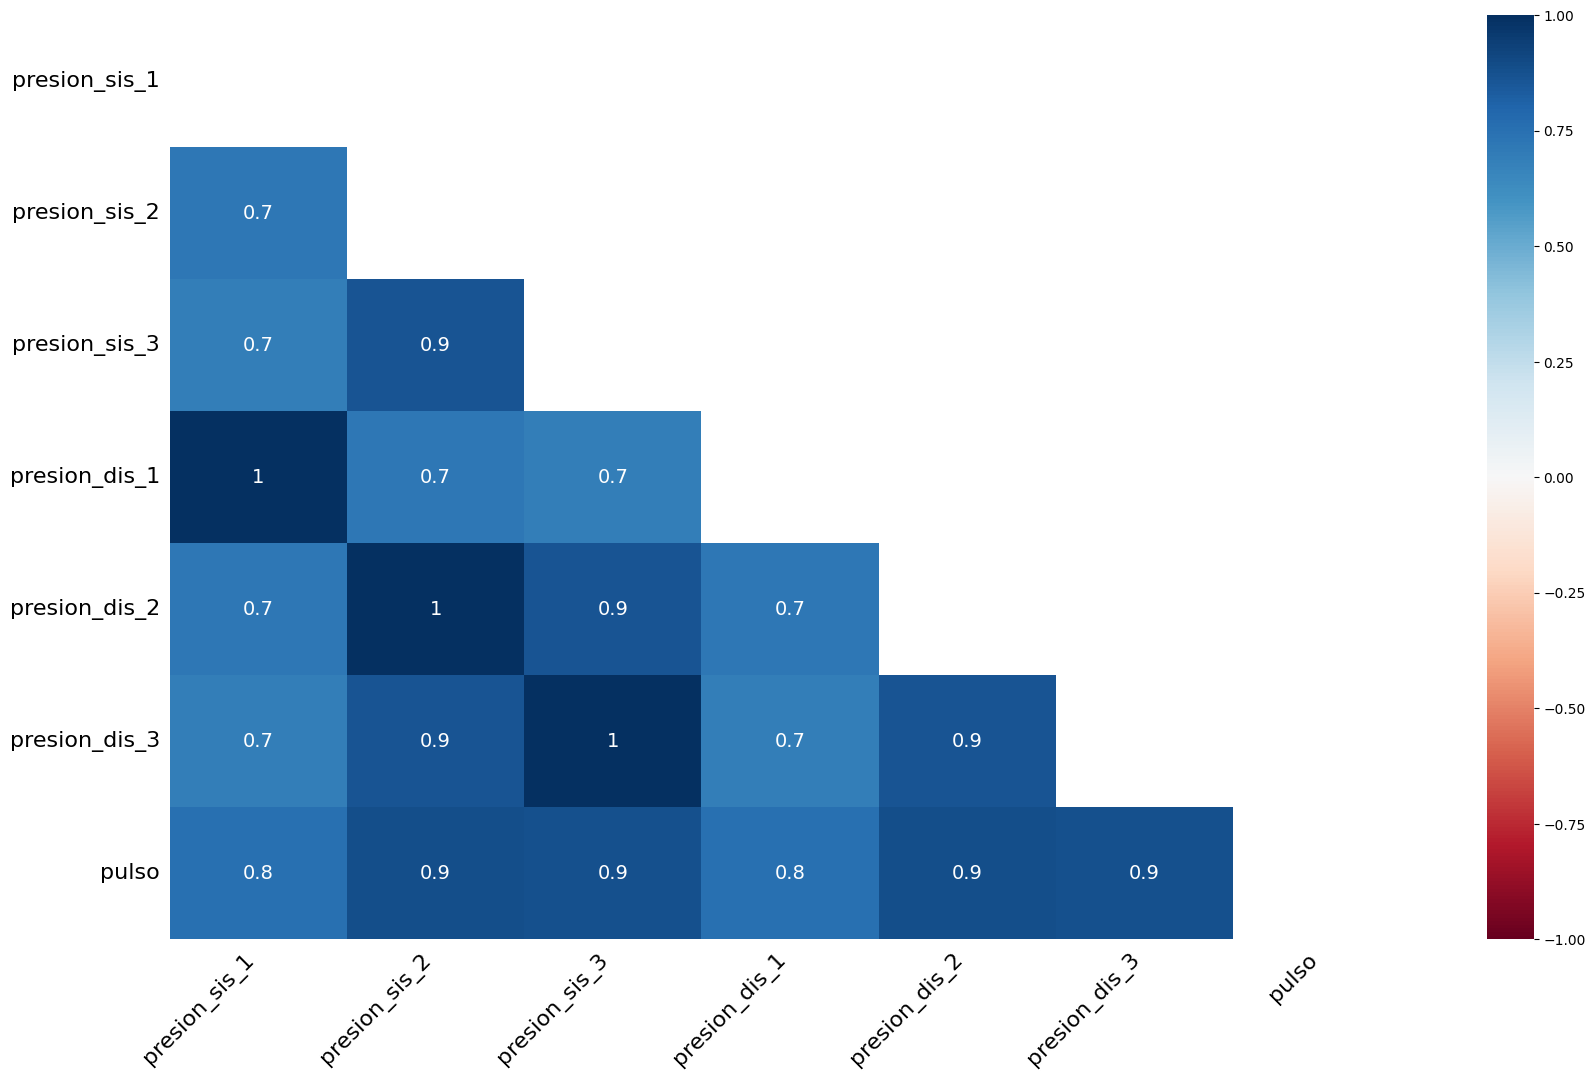

In [179]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Definimos las variables de presión
presion_vars = [
    'presion_sis_1', 'presion_sis_2', 'presion_sis_3',
    'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso'
]

# 1. Visualizar el patrón de "bloque"
plt.figure(figsize=(10,6))
msno.matrix(df_min[presion_vars])
plt.title('Patrón de Faltantes en Presión Arterial')
plt.show()

# 2. Correlación de nulidad
# Un valor de 1.0 significa que si falta una, falta la otra (indica patrón MAR).
msno.heatmap(df_min[presion_vars])
plt.show()

In [180]:
# Si hay una diferencia significativa en la media de edad, es MAR confirmado.
print(df_min.groupby(df_min['presion_sis_1'].isnull())['edad'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['genero'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['bmi'].mean())



presion_sis_1
False    51.186131
True     53.117582
Name: edad, dtype: float64
presion_sis_1
False    1.510305
True     1.538462
Name: genero, dtype: float64
presion_sis_1
False    29.765384
True     30.568522
Name: bmi, dtype: float64


Existe alta correlación en los faltantes de presión. Faltan en bloque. Esto se puede dar en este dataset ya que a veces los pacientes no participan de todas las etapas que constituyen esta encuesta.

TIPO: MAR

### **Laboratorios**

<Axes: >

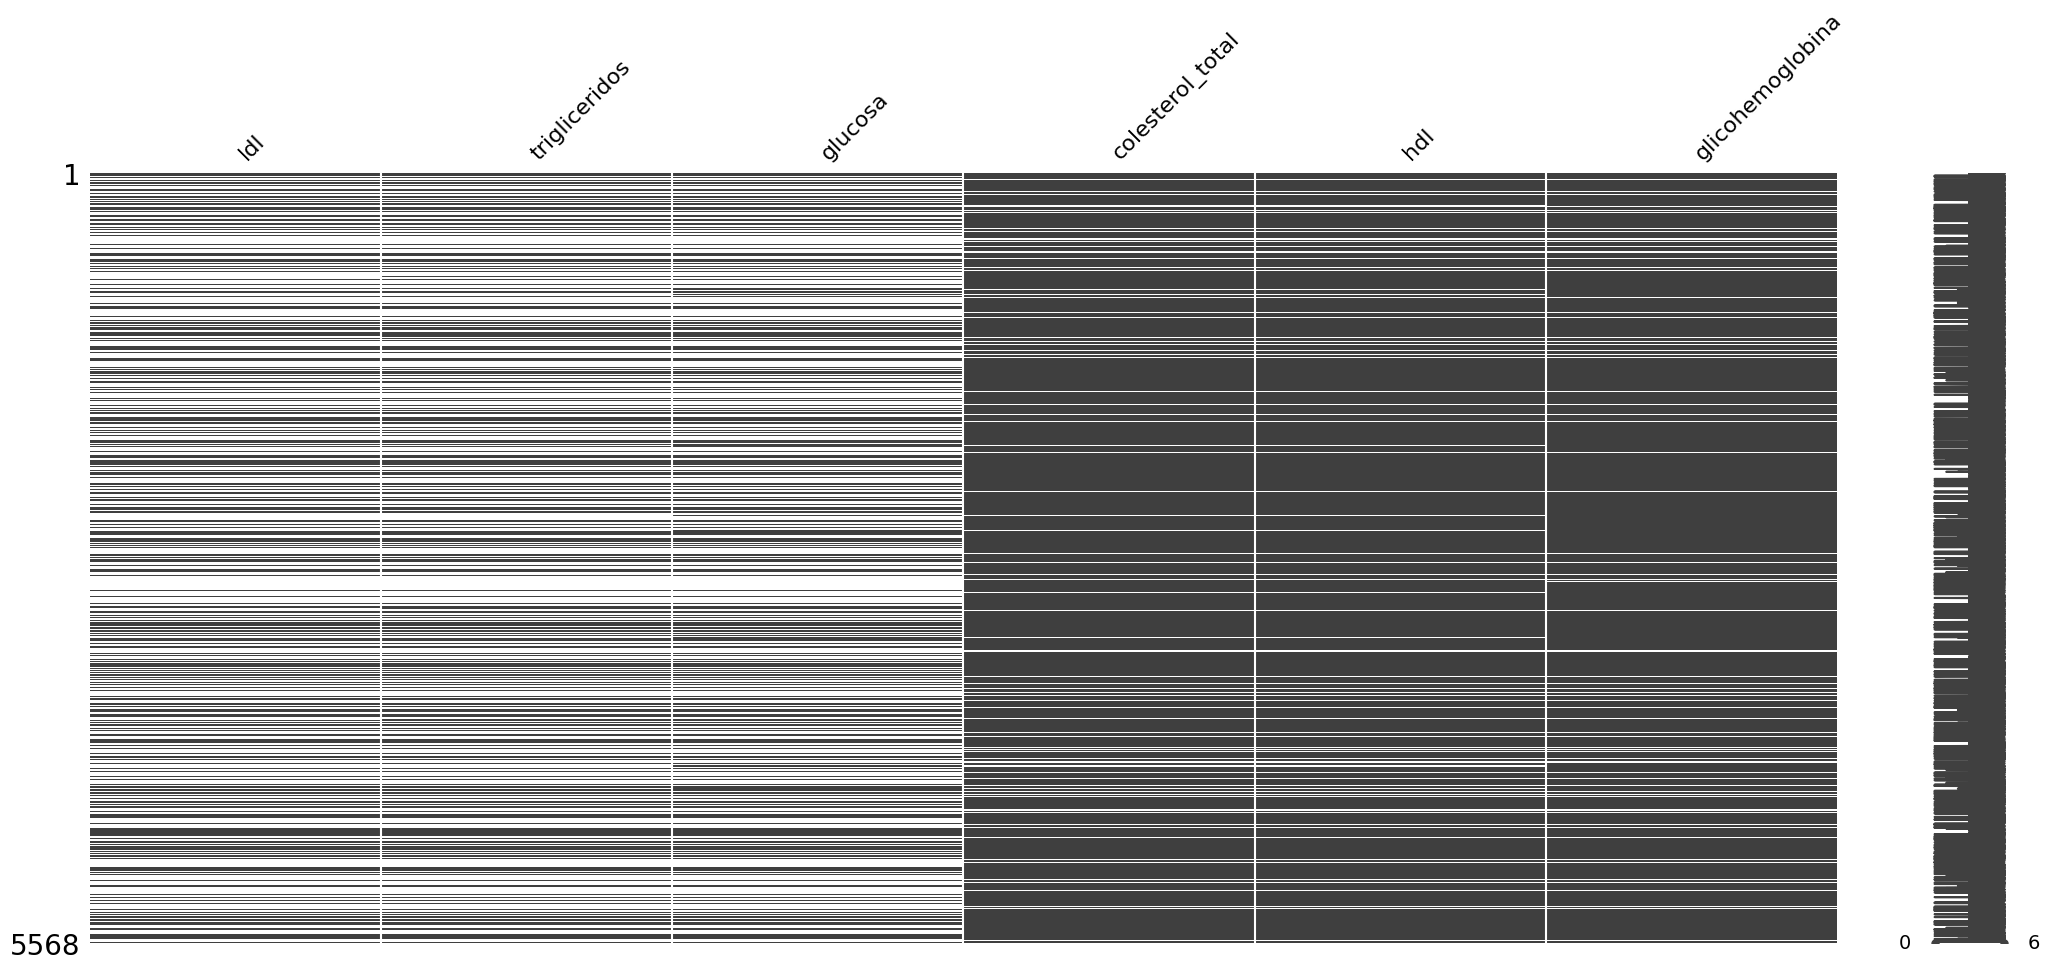

In [181]:
lab_vars = ['ldl', 'trigliceridos', 'glucosa', 'colesterol_total', 'hdl', 'glicohemoglobina']
msno.matrix(df_min[lab_vars])

Ya se observa un patrón en los faltantes.

In [182]:
# Crea una tabla de contingencia para ver si la falta de uno coincide con el otro
print(pd.crosstab(df_min['glucosa'].isnull(), df_min['trigliceridos'].isnull()))

trigliceridos  False  True 
glucosa                    
False           2393     42
True               0   3133


***GLUCOSA***

In [183]:
# # Traemos la columna de pesos desde df_clean a df_min usando el índice
# df_min['WTSAF2YR'] = df_clean['WTSAF2YR']

# # Creamos la marca de si el paciente fue seleccionado para la submuestra de ayuno
# # (Si el peso es > 0, fue seleccionado)
# df_min['seleccionado_ayuno'] = df_min['WTSAF2YR'].fillna(0) > 0

# # Realizamos la tabla de contingencia
# verificacion_ayuno = pd.crosstab(
#     df_min['seleccionado_ayuno'],
#     df_min['glucosa'].isnull(),
#     rownames=['¿Tiene peso de ayuno asignado?'],
#     colnames=['¿La Glucosa es NaN?']
# )

# print("TABLA DE VERIFICACIÓN DE SUBMUESTRA (BLOQUE DE AYUNO)")
# print("-" * 50)
# print(verificacion_ayuno)

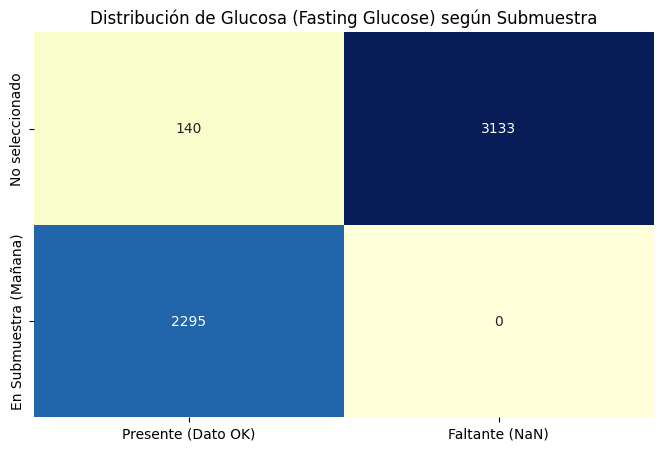

--------------------------------------------------
ANÁLISIS DE COBERTURA DE GLUCOSA EN AYUNO:
- Pacientes con dato oficial: 2295 (41.2%)
- Faltantes por diseño (Turno tarde): 3133 (56.3%)
--------------------------------------------------


In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Aseguramos que la columna exista en df_min antes de graficar
# Usamos df_clean para traer el peso de ayuno
df_min['WTSAF2YR'] = df_clean['WTSAF2YR']
df_min['seleccionado_ayuno'] = df_min['WTSAF2YR'].fillna(0) > 0

# 2. Crear la tabla de contingencia con nombres claros
# Usamos rename para no perder el rastro de qué es qué
tabla_visual = pd.crosstab(
    df_min['seleccionado_ayuno'],
    df_min['glucosa'].isnull()
)
tabla_visual.index = ['No seleccionado', 'En Submuestra (Mañana)']
tabla_visual.columns = ['Presente (Dato OK)', 'Faltante (NaN)']

# 3. Crear la visualización (Heatmap)
plt.figure(figsize=(8, 5))
sns.heatmap(tabla_visual, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.title('Distribución de Glucosa (Fasting Glucose) según Submuestra', fontsize=12)
plt.show()

# 4. Cálculo de porcentajes usando los nombres de las columnas (más seguro que iloc)
total = tabla_visual.values.sum()
presentes_submuestra = tabla_visual.loc['En Submuestra (Mañana)', 'Presente (Dato OK)']
faltantes_no_submuestra = tabla_visual.loc['No seleccionado', 'Faltante (NaN)']

print("-" * 50)
print("ANÁLISIS DE COBERTURA DE GLUCOSA EN AYUNO:")
print(f"- Pacientes con dato oficial: {presentes_submuestra} ({ (presentes_submuestra/total)*100 :.1f}%)")
print(f"- Faltantes por diseño (Turno tarde): {faltantes_no_submuestra} ({ (faltantes_no_submuestra/total)*100 :.1f}%)")
print("-" * 50)

El análisis de la estructura de datos reveló que las variables críticas de laboratorio (Glucosa, Triglicéridos y LDL) presentan un patrón de datos faltantes de tipo MAR (Missing at Random), con una ausencia de registros del 56% de la muestra. Esta condición no responde a un error de recolección, sino al diseño muestral de la encuesta NHANES. Específicamente, estas pruebas bioquímicas se restringen exclusivamente a la submuestra de ayuno matutino (Morning Fasting Subsample) por razones de protocolo clínico. Se validó que la falta de estos datos guarda una correlación casi perfecta con la ausencia de pesos estadísticos de ayuno (WTSAF2YR), confirmando que los pacientes no seleccionados para esta submuestra no poseen el dato por diseño del estudio.

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm

glucosa:https://wwwn.cdc.gov/nchs/data/nhanes/public/2017/labmethods/GLU-J-MET-508.pdf

glucosa serica: https://wwwn.cdc.gov/nchs/data/nhanes/public/2017/labmethods/BIOPRO-J-MET-Glucose-508.pdf

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm#LBDGLUSI

hdl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/HDL_J.

trigliceridos - ldl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/TRIGLY_J.htm

In [185]:
# Buscamos cualquier columna que contenga "GLU" en su nombre
columnas_glucosa = [col for col in df_clean.columns if 'GLU' in col.upper()]
print("Columnas encontradas con 'GLU':")
print(columnas_glucosa)

# Verificamos si alguna de esas tiene menos faltantes que la nuestra
for col in columnas_glucosa:
    nulos = df_clean[col].isnull().sum()
    print(f"{col}: {nulos} faltantes")

Columnas encontradas con 'GLU':
['LBXGLU', 'LBDGLUSI']
LBXGLU: 3133 faltantes
LBDGLUSI: 3133 faltantes


no son faltantes por falta de conversion definitivamente

In [186]:
# 1. Aseguramos tener las dos columnas en nuestro entorno
# LBXGLU es la de ayuno, LBXSGL es la general
glucosa_ayuno = df_clean['LBXGLU']
glucosa_general = df_clean['LBXSGL']

# 2. Creamos la versión consolidada
# fillna rellena los huecos de la de ayuno con los valores de la general
glucosa_consolidada = glucosa_ayuno.fillna(glucosa_general)

# 3. Calculamos las estadísticas de recuperación
nulos_original = glucosa_ayuno.isnull().sum()
nulos_final = glucosa_consolidada.isnull().sum()
recuperados = nulos_original - nulos_final

print("--- RESULTADOS DE LA CONSOLIDACIÓN DE GLUCOSA ---")
print(f"Faltantes iniciales (Solo Ayuno): {nulos_original}")
print(f"Faltantes finales (Consolidada):   {nulos_final}")
print(f"PACIENTES RECUPERADOS:             {recuperados}")
print(f"Mejora en la cobertura:            { (recuperados / len(df_clean)) * 100 :.2f}% del total del dataset")

--- RESULTADOS DE LA CONSOLIDACIÓN DE GLUCOSA ---
Faltantes iniciales (Solo Ayuno): 3133
Faltantes finales (Consolidada):   604
PACIENTES RECUPERADOS:             2529
Mejora en la cobertura:            45.42% del total del dataset


In [187]:
# 1. Creamos una copia de trabajo para no alterar el original por error
df_trabajo = df_clean[['SEQN', 'LBXGLU', 'LBXSGL']].copy()

# 2. Creamos la columna consolidada 'glucosa_total'
# Prioriza LBXGLU (Ayuno). Si es NaN, toma LBXSGL (General).
df_trabajo['glucosa_total'] = df_trabajo['LBXGLU'].fillna(df_trabajo['LBXSGL'])

# 3. Creamos la bandera de contexto (Fasting Flag) para la IA
# 1 si el dato es de Ayuno oficial, 0 si es de la General o si era NaN
df_trabajo['es_ayuno_estricto'] = 0
df_trabajo.loc[df_trabajo['LBXGLU'].notnull(), 'es_ayuno_estricto'] = 1

# 4. Verificamos los resultados
total_filas = len(df_trabajo)
nulos_antes = df_trabajo['LBXGLU'].isnull().sum()
nulos_despues = df_trabajo['glucosa_total'].isnull().sum()
recuperados = nulos_antes - nulos_despues

print(f"--- REPORTE DE RECOSTRUCCIÓN ---")
print(f"Total de pacientes analizados: {total_filas}")
print(f"Pacientes sin glucosa al inicio: {nulos_antes}")
print(f"Pacientes sin glucosa al final:  {nulos_despues}")
print(f"Se pueden rescatar {recuperados} registros")

--- REPORTE DE RECOSTRUCCIÓN ---
Total de pacientes analizados: 5568
Pacientes sin glucosa al inicio: 3133
Pacientes sin glucosa al final:  604
Se pueden rescatar 2529 registros


Par comprobar si hizo entrevista online solamente, o acudió a hacerse examenes

In [188]:
# 1. Primero veamos si RIDSTATR está en df_clean y qué valores tiene
if 'RIDSTATR' in df_clean.columns:
    # Creamos la tabla comparando la Glucosa Consolidada (o la original) con el estado de examen
    # Nota: Usamos df_clean['LBXGLU'].fillna(df_clean['LBXSGL']) para representar la glucosa recuperada

    glucosa_temp = df_clean['LBXGLU'].fillna(df_clean['LBXSGL'])

    tabla_mar = pd.crosstab(
        df_clean['RIDSTATR'].map({1: 'Solo Entrevista (Casa)', 2: 'Entrevista + Examen (MEC)'}),
        glucosa_temp.isnull().map({True: 'Faltante (NaN)', False: 'Con Dato'}),
        rownames=['Estado del Participante'],
        colnames=['Estado Glucosa']
    )

    print("ANÁLISIS DE DATOS FALTANTES (MAR) EN DF_CLEAN")
    print("-" * 50)
    print(tabla_mar)
    print("-" * 50)

    # Calculamos el porcentaje de nulos que se explican por no haber ido al examen
    solo_entrevista_y_nulo = tabla_mar.loc['Solo Entrevista (Casa)', 'Faltante (NaN)']
    total_nulos = tabla_mar['Faltante (NaN)'].sum()

    print(f"Del total de nulos, el {(solo_entrevista_y_nulo/total_nulos)*100:.1f}% se debe a participantes que no fueron al examen médico.")
else:
    print("La columna 'RIDSTATR' no se encuentra en df_clean. Busca columnas similares con: [c for c in df_clean.columns if 'STAT' in c]")

ANÁLISIS DE DATOS FALTANTES (MAR) EN DF_CLEAN
--------------------------------------------------
Estado Glucosa             Con Dato  Faltante (NaN)
Estado del Participante                            
Entrevista + Examen (MEC)      4964             300
Solo Entrevista (Casa)            0             304
--------------------------------------------------
Del total de nulos, el 50.3% se debe a participantes que no fueron al examen médico.


In [189]:
# 1. Identificar quiénes tienen solo la versión SI
solo_si = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].notnull()]

# 2. Identificar quiénes tienen ambas
ambas = df_clean[df_clean['LBXGLU'].notnull() & df_clean['LBDGLUSI'].notnull()]

# 3. Identificar quiénes no tienen ninguna (los verdaderos faltantes)
ninguna = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].isnull()]

print(f"Pacientes a rescatar (Solo tienen LBDGLUSI): {solo_si.shape[0]}")
print(f"Pacientes con datos en ambas columnas: {ambas.shape[0]}")
print(f"Pacientes sin datos en ninguna (Faltante Real): {ninguna.shape[0]}")

Pacientes a rescatar (Solo tienen LBDGLUSI): 0
Pacientes con datos en ambas columnas: 2435
Pacientes sin datos en ninguna (Faltante Real): 3133


In [190]:
# Verificamos HDL (LBDHDD) contra el estado de examen (para comprobar que definitivamente no tiene datos de examenes de laboratorio)
verificacion_hdl = pd.crosstab(
    df_clean['RIDSTATR'],
    df_clean['LBDHDD'].isnull()
)
print(verificacion_hdl)

LBDHDD    False  True 
RIDSTATR              
1.0           0    304
2.0        4936    328


TIPO: MAR

Los faltantes son porque los pacientes no fueron elegidos para hacerse estudio con el ayuno o porque hicieron entrevista online.

***TRIGLICERIDOS***

In [191]:
# Si la correlación es 1.0, es exactamente el mismo dato en distinta unidad
print(df_clean[['LBXTR', 'LBDSTRSI']].corr())

             LBXTR  LBDSTRSI
LBXTR     1.000000  0.998812
LBDSTRSI  0.998812  1.000000


In [192]:
# 1. Comparamos los nulos de ambas
print(f"Faltantes en trigliceridos (LBXTR - mg/dL): {df_clean['LBXTR'].isnull().sum()}")
print(f"Faltantes en LBDSTRSI (mmol/L): {df_clean['LBDSTRSI'].isnull().sum()}")

# 2. Verificamos la correlación
# Si es 1.0, son la misma variable escalada
correlacion = df_clean['LBXTR'].corr(df_clean['LBDSTRSI'])
print(f"\nCorrelación entre ambas: {correlacion:.4f}")

# 3. Vemos si hay casos donde una está y la otra no
casos_recuperables = df_clean[df_clean['LBXTR'].isnull() & df_clean['LBDSTRSI'].notnull()].shape[0]
print(f"Casos donde LBDSTRSI podría 'salvar' a LBXTR: {casos_recuperables}")

Faltantes en trigliceridos (LBXTR - mg/dL): 3175
Faltantes en LBDSTRSI (mmol/L): 655

Correlación entre ambas: 0.9988
Casos donde LBDSTRSI podría 'salvar' a LBXTR: 2531


In [193]:
# # 1. Recuperamos los datos (Fórmula de conversión: mmol/L * 88.57 = mg/dL)
# df_min['trigliceridos'] = df_min['trigliceridos'].fillna(df_clean['LBDSTRSI'] * 88.57)

# # 2. Verificamos cuántos faltantes quedan ahora
# nuevos_faltantes = df_min['trigliceridos'].isnull().sum()
# print(f"Faltantes finales en trigliceridos: {nuevos_faltantes} (¡Bajamos de 3175 a {nuevos_faltantes}!)")

In [194]:
# Crea una tabla de contingencia para ver si la falta de uno coincide con el otro
print(pd.crosstab(df_min['glucosa'].isnull(), df_min['trigliceridos'].isnull()))

trigliceridos  False  True 
glucosa                    
False           2393     42
True               0   3133


***TRIGLICERIDOS***

In [195]:
# Si la correlación es 1.0, es exactamente el mismo dato en distinta unidad
print(df_clean[['LBXTR', 'LBDSTRSI']].corr())

             LBXTR  LBDSTRSI
LBXTR     1.000000  0.998812
LBDSTRSI  0.998812  1.000000


In [196]:
# 1. Comparamos los nulos de ambas
print(f"Faltantes en trigliceridos (LBXTR - mg/dL): {df_clean['LBXTR'].isnull().sum()}")
print(f"Faltantes en LBDSTRSI (mmol/L): {df_clean['LBDSTRSI'].isnull().sum()}")

# 2. Verificamos la correlación
# Si es 1.0, son la misma variable escalada
correlacion = df_clean['LBXTR'].corr(df_clean['LBDSTRSI'])
print(f"\nCorrelación entre ambas: {correlacion:.4f}")

# 3. Vemos si hay casos donde una está y la otra no
casos_recuperables = df_clean[df_clean['LBXTR'].isnull() & df_clean['LBDSTRSI'].notnull()].shape[0]
print(f"Casos donde LBDSTRSI podría 'salvar' a LBXTR: {casos_recuperables}")

Faltantes en trigliceridos (LBXTR - mg/dL): 3175
Faltantes en LBDSTRSI (mmol/L): 655

Correlación entre ambas: 0.9988
Casos donde LBDSTRSI podría 'salvar' a LBXTR: 2531


In [197]:
# 1. Verificamos la correlación para confirmar que son la misma medida
correlacion_trig = df_clean['LBXTR'].corr(df_clean['LBDSTRSI'])

# 2. Buscamos casos donde falta la principal pero está la secundaria
casos_recuperables_trig = df_clean[df_clean['LBXTR'].isnull() & df_clean['LBDSTRSI'].notnull()].shape[0]

print(f"--- ANÁLISIS DE UNIDADES (TRIGLICÉRIDOS) ---")
print(f"Correlación mg/dL vs mmol/L: {correlacion_trig:.4f}")
print(f"Casos recuperables mediante conversión: {casos_recuperables_trig}")

# 3. Comprobamos la relación con el estado de examen (RIDSTATR)
tabla_trig_stat = pd.crosstab(
    df_clean['RIDSTATR'].map({1: 'Solo Entrevista', 2: 'Entrevista + Examen'}),
    df_clean['LBXTR'].isnull().map({True: 'Faltante', False: 'Con Dato'})
)
print("\n--- RELACIÓN CON ESTADO DE EXAMEN ---")
print(tabla_trig_stat)

--- ANÁLISIS DE UNIDADES (TRIGLICÉRIDOS) ---
Correlación mg/dL vs mmol/L: 0.9988
Casos recuperables mediante conversión: 2531

--- RELACIÓN CON ESTADO DE EXAMEN ---
LBXTR                Con Dato  Faltante
RIDSTATR                               
Entrevista + Examen      2393      2871
Solo Entrevista             0       304


In [198]:
# # 1. Recuperamos los datos (Fórmula de conversión: mmol/L * 88.57 = mg/dL)
# df_min['trigliceridos'] = df_min['trigliceridos'].fillna(df_clean['LBDSTRSI'] * 88.57)

# # 2. Verificamos cuántos faltantes quedan ahora
# nuevos_faltantes = df_min['trigliceridos'].isnull().sum()
# print(f"Faltantes finales en trigliceridos: {nuevos_faltantes} (¡Bajamos de 3175 a {nuevos_faltantes}!)")

In [199]:
# Relación entre Triglicéridos y la Submuestra de Ayuno
df_clean['tiene_peso_ayuno'] = df_clean['WTSAF2YR'].fillna(0) > 0

tabla_trig_ayuno = pd.crosstab(
    df_clean['tiene_peso_ayuno'],
    df_clean['LBXTR'].isnull(),
    rownames=['¿Está en Submuestra Ayuno?'],
    colnames=['¿Triglicéridos es NaN?']
)

print("\n--- RELACIÓN CON SUBMUESTRA DE AYUNO ---")
print(tabla_trig_ayuno)


--- RELACIÓN CON SUBMUESTRA DE AYUNO ---
¿Triglicéridos es NaN?      False  True 
¿Está en Submuestra Ayuno?              
False                         135   3138
True                         2258     37


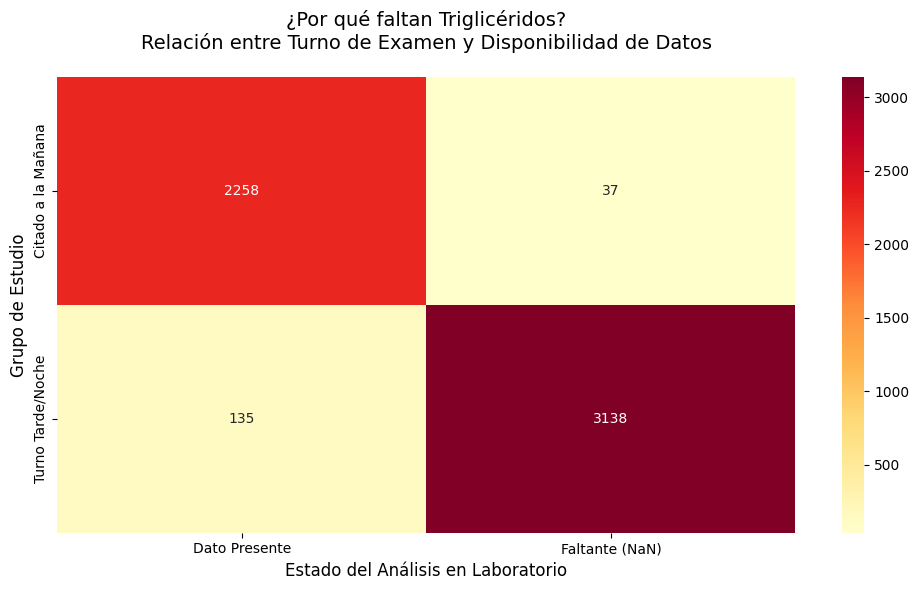


LECTURA DEL GRÁFICO:
1. El bloque de 'Citado a la Mañana' concentra casi todos los nulos.
2. Esto demuestra que la falta de dato es ESTRUCTURAL (Protocolo del NHANES).
3. Los nulos en el grupo de 'Mañana' son fallos técnicos menores, ideales para recuperar con MICE.


In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparar los datos para el gráfico
# Mapeamos los valores para que el gráfico sea autoexplicativo
df_plot = df_clean.copy()
df_plot['Submuestra'] = df_plot['WTSAF2YR'].fillna(0) > 0
df_plot['Submuestra'] = df_plot['Submuestra'].map({True: 'Citado a la Mañana', False: 'Turno Tarde/Noche'})
df_plot['Estado_Dato'] = df_plot['LBXTR'].isnull().map({True: 'Faltante (NaN)', False: 'Dato Presente'})

# 2. Crear la tabla de contingencia
tabla_visual = pd.crosstab(df_plot['Submuestra'], df_plot['Estado_Dato'])

# 3. Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_visual, annot=True, fmt="d", cmap="YlOrRd", cbar=True)

plt.title('¿Por qué faltan Triglicéridos?\nRelación entre Turno de Examen y Disponibilidad de Datos', fontsize=14, pad=20)
plt.ylabel('Grupo de Estudio', fontsize=12)
plt.xlabel('Estado del Análisis en Laboratorio', fontsize=12)

plt.tight_layout()
plt.show()

# Resumen explicativo
print("\nLECTURA DEL GRÁFICO:")
print(f"1. El bloque de '{df_plot['Submuestra'].unique()[1]}' concentra casi todos los nulos.")
print("2. Esto demuestra que la falta de dato es ESTRUCTURAL (Protocolo del NHANES).")
print("3. Los nulos en el grupo de 'Mañana' son fallos técnicos menores, ideales para recuperar con MICE.")

TIPO: MAR

Por entrevista online o porque falta rescatar algunos de datos de otra columna

### ***Colesterol total***

In [201]:
# 1. Buscamos variables relacionadas al Colesterol Total
cols_tc = [col for col in df_clean.columns if 'LBXTC' in col.upper() or 'LBDTCSI' in col.upper()]
print(f"Variables encontradas: {cols_tc}")

# 2. Verificamos nulos y correlación
if 'LBDTCSI' in df_clean.columns:
    correlacion_tc = df_clean['LBXTC'].corr(df_clean['LBDTCSI'])
    recuperables_tc = df_clean[df_clean['LBXTC'].isnull() & df_clean['LBDTCSI'].notnull()].shape[0]

    print(f"\n--- ANÁLISIS DE COLESTEROL TOTAL ---")
    print(f"Nulos en LBXTC (mg/dL): {df_clean['LBXTC'].isnull().sum()}")
    print(f"Correlación mg/dL vs mmol/L: {correlacion_tc:.4f}")
    print(f"Casos recuperables por conversión: {recuperables_tc}")

Variables encontradas: ['LBXTC', 'LBDTCSI']

--- ANÁLISIS DE COLESTEROL TOTAL ---
Nulos en LBXTC (mg/dL): 632
Correlación mg/dL vs mmol/L: 1.0000
Casos recuperables por conversión: 0


In [202]:
# Filtramos solo a los que fueron al examen físico
fueron_al_examen = df_clean[df_clean['RIDSTATR'] == 2]

# Vemos si a los que les falta Colesterol, también les falta Glucosa y HDL
nulos_seriales = fueron_al_examen[
    fueron_al_examen['LBXTC'].isnull() &
    fueron_al_examen['LBDHDD'].isnull()
].shape[0]

print(f"Pacientes que fueron al examen pero no tienen NINGÚN laboratorio: {nulos_seriales}")
print(f"Esto representa el {(nulos_seriales/328)*100:.1f}% de tus nulos misteriosos.")

Pacientes que fueron al examen pero no tienen NINGÚN laboratorio: 328
Esto representa el 100.0% de tus nulos misteriosos.


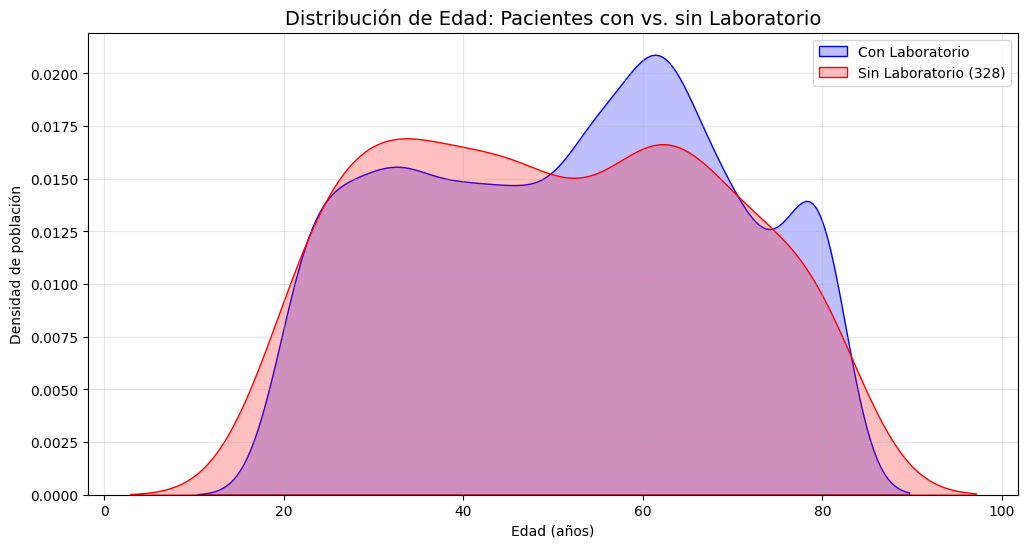

--- ESTADÍSTICAS DE EDAD (Grupo de 328) ---
count    328.000000
mean      49.826220
std       18.145613
min       20.000000
25%       34.000000
50%       48.500000
75%       65.000000
max       80.000000
Name: RIDAGEYR, dtype: float64


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Creamos los grupos para comparar
# Grupo A: Fue al examen y TIENE laboratorio
con_lab = fueron_al_examen[fueron_al_examen['LBXTC'].notnull()]

# Grupo B: Fue al examen pero NO TIENE laboratorio (los 328)
sin_lab_328 = fueron_al_examen[fueron_al_examen['LBXTC'].isnull()]

# 2. Graficamos la distribución
plt.figure(figsize=(12, 6))
sns.kdeplot(con_lab['RIDAGEYR'], label='Con Laboratorio', fill=True, color='blue')
sns.kdeplot(sin_lab_328['RIDAGEYR'], label='Sin Laboratorio (328)', fill=True, color='red')

plt.title('Distribución de Edad: Pacientes con vs. sin Laboratorio', fontsize=14)
plt.xlabel('Edad (años)')
plt.ylabel('Densidad de población')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 3. Estadísticos rápidos
print("--- ESTADÍSTICAS DE EDAD (Grupo de 328) ---")
print(sin_lab_328['RIDAGEYR'].describe())

Hay 632 nulos de los cuales, 304 son de los que hicieron la entrevista online.

Vemos en el grafico que los que no tienen laboratorio estan entre los 34 y 65 años. Va a ser importante la imputaciónn aqui.

En la documetación se menciona que se perdieron 697 datos de esta columna.

TIPO: MAR


### ***HDL***

TIPO: MAR

In [204]:
# Buscamos variables de HDL
cols_hdl = [col for col in df_clean.columns if 'LBDHDD' in col.upper()]
print(f"Variables encontradas para HDL: {cols_hdl}")

# Verificamos si existe la versión en unidades SI (LBDHDDSI) y si podemos rescatar algo
if 'LBDHDDSI' in df_clean.columns:
    recuperables_hdl = df_clean[df_clean['LBDHDD'].isnull() & df_clean['LBDHDDSI'].notnull()].shape[0]
    print(f"Casos recuperables en HDL mediante conversión: {recuperables_hdl}")
else:
    print("No hay columna de unidades SI para HDL.")

Variables encontradas para HDL: ['LBDHDD', 'LBDHDDSI']
Casos recuperables en HDL mediante conversión: 0


In [205]:
# 1. Análisis de nulos y unidades para HDL
print(f"--- ANÁLISIS DE HDL (LBDHDD) ---")
nulos_hdl_total = df_clean['LBDHDD'].isnull().sum()
print(f"Nulos totales en HDL (mg/dL): {nulos_hdl_total}")

# 2. Verificamos si existe la unidad SI y si hay algo que rescatar
if 'LBDHDDSI' in df_clean.columns:
    recuperables_hdl = df_clean[df_clean['LBDHDD'].isnull() & df_clean['LBDHDDSI'].notnull()].shape[0]
    print(f"Casos recuperables por unidad SI: {recuperables_hdl}")

# 3. Cruzamos contra los nulos de Colesterol Total (LBXTC)
# Esto confirmará si fallan en bloque
coincidencia_hdl_tc = df_clean[df_clean['LBDHDD'].isnull() & df_clean['LBXTC'].isnull()].shape[0]
print(f"Coincidencia de nulos (HDL + Colesterol Total): {coincidencia_hdl_tc}")

# 4. Tipificación final con RIDSTATR
tabla_hdl_stat = pd.crosstab(
    df_clean['RIDSTATR'].map({1: 'Solo Entrevista', 2: 'Entrevista + Examen'}),
    df_clean['LBDHDD'].isnull().map({True: 'Faltante (NaN)', False: 'Con Dato'})
)
print("\n--- DISTRIBUCIÓN DE FALTANTES POR ESTADO ---")
print(tabla_hdl_stat)

--- ANÁLISIS DE HDL (LBDHDD) ---
Nulos totales en HDL (mg/dL): 632
Casos recuperables por unidad SI: 0
Coincidencia de nulos (HDL + Colesterol Total): 632

--- DISTRIBUCIÓN DE FALTANTES POR ESTADO ---
LBDHDD               Con Dato  Faltante (NaN)
RIDSTATR                                     
Entrevista + Examen      4936             328
Solo Entrevista             0             304


In [206]:
# Filtramos a los 328 casos que fueron al examen pero no tienen sangre
faltantes_328 = df_clean[(df_clean['LBXTC'].isnull()) & (df_clean['RIDSTATR'] == 2)]

# 1. ¿Tienen medidas físicas (BMI)?
con_bmi = faltantes_328['BMXBMI'].notnull().sum()

# 2. ¿Tienen medidas de presión arterial?
con_presion = faltantes_328['BPXSY1'].notnull().sum()

print(f"--- ANÁLISIS FORENSE DE LOS 328 CASOS ---")
print(f"Pacientes que se midieron el IMC (BMI): {con_bmi} de 328")
print(f"Pacientes que se midieron la Presión: {con_presion} de 328")

--- ANÁLISIS FORENSE DE LOS 328 CASOS ---
Pacientes que se midieron el IMC (BMI): 315 de 328
Pacientes que se midieron la Presión: 279 de 328


### ***LDL***

Estos faltantes derivan de la falta de datos de colesterol total, trigliceridos y hdl. EL valor de ldl deriva de una formula que involucra esas variables

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/TRIGLY_J.htm#LBDLDL

TIPO: MAR

In [207]:
# --- ANÁLISIS DE LDL (LBDLDL vs LBDLDLSI) ---

# 1. Comparamos los nulos de ambas
nulos_mg = df_clean['LBDLDL'].isnull().sum()
nulos_si = df_clean['LBDLDLSI'].isnull().sum()

print(f"--- COMPARATIVA DE NULOS LDL ---")
print(f"Faltantes en LBDLDL (mg/dL): {nulos_mg}")
print(f"Faltantes en LBDLDLSI (mmol/L): {nulos_si}")

# 2. Verificamos la correlación
# Si es 1.0 (o muy cercana), son la misma variable en distintas escalas
if 'LBDLDL' in df_clean.columns and 'LBDLDLSI' in df_clean.columns:
    correlacion = df_clean['LBDLDL'].corr(df_clean['LBDLDLSI'])
    print(f"\nCorrelación entre ambas: {correlacion:.4f}")

    # 3. Vemos si hay casos donde una está y la otra no (El potencial de recuperación)
    casos_recuperables = df_clean[df_clean['LBDLDL'].isnull() & df_clean['LBDLDLSI'].notnull()].shape[0]
    print(f"Casos donde LBDLDLSI podría 'salvar' a LBDLDL: {casos_recuperables}")

    # 4. Cálculo de nulos finales si rescatáramos esos casos
    print(f"\nSi recuperamos esos casos, los nulos totales de LDL bajarían a: {nulos_mg - casos_recuperables}")
else:
    print("\nError: Una de las columnas de LDL no se encuentra en el dataframe.")

--- COMPARATIVA DE NULOS LDL ---
Faltantes en LBDLDL (mg/dL): 3200
Faltantes en LBDLDLSI (mmol/L): 3200

Correlación entre ambas: 1.0000
Casos donde LBDLDLSI podría 'salvar' a LBDLDL: 0

Si recuperamos esos casos, los nulos totales de LDL bajarían a: 3200


### ***BMI***

In [208]:
# --- ANÁLISIS DE NULOS EN BMI (BMXBMI) ---

# 1. Cruzamos con el estado de entrevista/examen (RIDSTATR)
tabla_bmi = pd.crosstab(df_clean['RIDSTATR'], df_clean['BMXBMI'].isnull())
tabla_bmi.columns = ['Con Dato BMI', 'Faltante (NaN)']
tabla_bmi.index = ['Solo Entrevista', 'Entrevista + Examen']

print("--- DISTRIBUCIÓN DE FALTANTES POR ESTADO ---")
print(tabla_bmi)

# 2. Análisis de "Faltantes Parciales"
# A veces tienen el Peso pero no la Talla, o viceversa, lo que hace que el BMI sea NaN.
tienen_peso = df_clean[df_clean['BMXBMI'].isnull() & df_clean['BMXWT'].notnull()].shape[0]
tienen_talla = df_clean[df_clean['BMXBMI'].isnull() & df_clean['BMXHT'].notnull()].shape[0]

print(f"\nNulos totales en BMI: {df_clean['BMXBMI'].isnull().sum()}")
print(f"Casos con Peso pero sin Talla: {tienen_peso}")
print(f"Casos con Talla pero sin Peso: {tienen_talla}")

--- DISTRIBUCIÓN DE FALTANTES POR ESTADO ---
                     Con Dato BMI  Faltante (NaN)
Solo Entrevista                 0             304
Entrevista + Examen          5174              90

Nulos totales en BMI: 394
Casos con Peso pero sin Talla: 10
Casos con Talla pero sin Peso: 10


In [209]:
# Buscamos columnas que contengan 'BMI' pero que no sean 'BMXBMI'
columnas_comentario = [col for col in df.columns if 'BMI' in col and col != 'BMXBMI']
print(f"Columnas de comentario encontradas: {columnas_comentario}")

# Si existen, podemos ver por qué faltan los datos de esos 90 casos
if 'BMIWT' in df.columns:
    motivos_peso = df.loc[df['BMXBMI'].isnull() & (df['RIDSTATR'] == 2), 'BMIWT'].value_counts()
    print("\nMotivos de falta de PESO en los 90 casos:")
    print(motivos_peso)

Columnas de comentario encontradas: ['BMIWT', 'BMIRECUM', 'BMIHEAD', 'BMIHT', 'BMILEG', 'BMIARML', 'BMIARMC', 'BMIWAIST', 'BMIHIP']

Motivos de falta de PESO en los 90 casos:
BMIWT
3.0    21
1.0    11
4.0     1
Name: count, dtype: int64


In [210]:
# 1. Identificamos los 90 casos que fueron al examen pero no tienen BMI
misteriosos_90 = df[(df['BMXBMI'].isnull()) & (df['RIDSTATR'] == 2)]

# 2. Buscamos las columnas de códigos de comentario de peso y talla
# BMIWT: Weight Comment, BMIHT: Height Comment
cols_interes = [c for c in ['BMIWT', 'BMIHT'] if c in df.columns]

if cols_interes:
    print("--- EVIDENCIA ENCONTRADA EN LOS 90 CASOS ---")
    for col in cols_interes:
        print(f"\nDistribución de motivos en {col}:")
        print(misteriosos_90[col].value_counts())
else:
    print("Las columnas de comentarios (BMIWT/BMIHT) no están en 'df'.")
    print("Posiblemente fueron eliminadas durante la selección de variables.")

--- EVIDENCIA ENCONTRADA EN LOS 90 CASOS ---

Distribución de motivos en BMIWT:
BMIWT
3.0    21
1.0    11
4.0     1
Name: count, dtype: int64

Distribución de motivos en BMIHT:
BMIHT
1.0    32
Name: count, dtype: int64


Para la variable de Índice de Masa Corporal (BMI), se identificaron 90 casos faltantes entre los participantes que asistieron al centro de examen. Mediante el análisis de las variables de auditoría de NHANES (BMIWT y BMIHT), se determinó que la ausencia de datos no es aleatoria, sino que responde a:

Limitaciones Clínicas (24.4%): Sujetos con limitaciones físicas severas o exclusiones por seguridad médica (Códigos 3.0 y 4.0).

Restricciones de Procedimiento (47.7%): Casos donde no fue posible obtener la medición (Código 1.0), asociados habitualmente a dificultades técnicas con el estadiómetro o abandono voluntario de la estación por parte del participante.


TIPO: MAR

### ***PROTEÍNA C***

In [211]:
# --- ANÁLISIS DE NULOS EN PROTEÍNA C (LBXHSCRP) ---

# 1. Comparación con el examen físico
tabla_pcr = pd.crosstab(df['RIDSTATR'], df['LBXHSCRP'].isnull())
tabla_pcr.columns = ['Con Dato PCR', 'Faltante (NaN)']
tabla_pcr.index = ['Solo Entrevista', 'Entrevista + Examen']

print("--- DISTRIBUCIÓN DE FALTANTES PCR ---")
print(tabla_pcr)

# 2. ¿Son los mismos que no tienen Colesterol Total?
# LBXTC es Colesterol Total. Si ambos son NaN, es falta de muestra de sangre.
ambos_nulos = df[df['LBXHSCRP'].isnull() & df['LBXTC'].isnull()].shape[0]
solo_pcr_nulo = df[df['LBXHSCRP'].isnull() & df['LBXTC'].notnull()].shape[0]

print(f"\nFaltantes por falta de sangre (Ambos nulos): {ambos_nulos}")
print(f"Faltantes específicos de PCR (Tienen sangre pero no PCR): {solo_pcr_nulo}")

--- DISTRIBUCIÓN DE FALTANTES PCR ---
                     Con Dato PCR  Faltante (NaN)
Solo Entrevista                 0             550
Entrevista + Examen          7250            1454

Faltantes por falta de sangre (Ambos nulos): 1957
Faltantes específicos de PCR (Tienen sangre pero no PCR): 47


El análisis de la variable Proteína C Reactiva (LBXHSCRP) revela un total de 2004 faltantes (incluyendo los casos de no-entrevista). La justificación de estos nulos se fundamenta en los protocolos de laboratorio de NHANES:

Falta de Muestra Biológica (97.6% de los nulos): Correspondiente a participantes que no asistieron al examen físico o cuya venopunción fue fallida.

Criterio de Priorización Sugerida (2.4% de los nulos): En 47 casos se obtuvo muestra de sangre (confirmado por la presencia de otros valores de laboratorio), pero no se procesó la PCR. Según el manual de laboratorio HSCRP_J, esto ocurre por Volumen Insuficiente (QNS) o Interferencia Técnica (muestras hemolizadas o lipémicas) que impiden la medición de alta sensibilidad."

TIPO: MAR

### ***FUMADOR ACTUAL***

In [212]:
# --- ANÁLISIS DE FILTRO PARA FUMADOR ACTUAL (SMQ040) ---

# SMQ020: "¿Ha fumado al menos 100 cigarrillos en su vida?" (1=Sí, 2=No)
# SMQ040: "¿Fuma usted ahora?" (1=Cada día, 2=Algunos días, 3=Nunca)

tabla_fumador = pd.crosstab(df['SMQ020'], df['SMQ040'].isnull(), dropna=False)
tabla_fumador.columns = ['Con Dato SMQ040', 'Faltante (NaN)']
tabla_fumador.index = ['Fumó +100 cig (Sí)', 'Fumó +100 cig (No)', 'No sabe/No responde']

print("--- ANÁLISIS DE FLUJO DE CUESTIONARIO ---")
print(tabla_fumador)

--- ANÁLISIS DE FLUJO DE CUESTIONARIO ---
                     Con Dato SMQ040  Faltante (NaN)
Fumó +100 cig (Sí)              2359               0
Fumó +100 cig (No)                 0            3497
No sabe/No responde                0            3398


--- ANÁLISIS DE EDAD DE LOS NULOS EN SMQ040 ---
Total de nulos: 3234
Edad mínima: 20.0
Edad máxima: 80.0
Cantidad de nulos que son menores de 18 años: 0


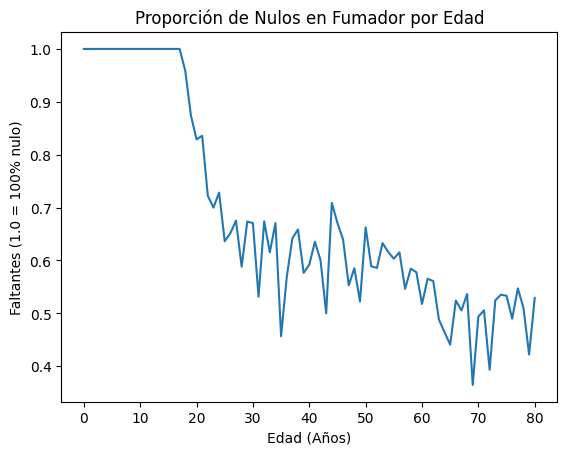

In [213]:
# 1. Vamos a ver la edad de los que NO tienen dato en SMQ040
nulos_fumador = df_clean[df_clean['SMQ040'].isnull()]

print("--- ANÁLISIS DE EDAD DE LOS NULOS EN SMQ040 ---")
print(f"Total de nulos: {len(nulos_fumador)}")
print(f"Edad mínima: {nulos_fumador['RIDAGEYR'].min()}")
print(f"Edad máxima: {nulos_fumador['RIDAGEYR'].max()}")

# 2. Contemos cuántos son menores de 18 años
menores_18 = nulos_fumador[nulos_fumador['RIDAGEYR'] < 18].shape[0]
print(f"Cantidad de nulos que son menores de 18 años: {menores_18}")

# 3. Veamos si hay una relación directa entre Edad y el Nulo
import matplotlib.pyplot as plt
df.groupby('RIDAGEYR')['SMQ040'].apply(lambda x: x.isnull().mean()).plot(kind='line')
plt.title('Proporción de Nulos en Fumador por Edad')
plt.ylabel('Faltantes (1.0 = 100% nulo)')
plt.xlabel('Edad (Años)')
plt.show()

In [214]:
# Verificamos si los nulos de SMQ040 coinciden exactamente con SMQ020 == 2 (Smoked at least 100 cigarettes in life - 2. No)
coincidencia = df_clean[df_clean['SMQ040'].isnull() & (df_clean['SMQ020'] == 2)].shape[0]

print(f"Nulos de SMQ040 que declararon NO haber fumado 100 cigarrillos: {coincidencia}")
print(f"Diferencia (Nulos sin explicación): {3234 - coincidencia}")

Nulos de SMQ040 que declararon NO haber fumado 100 cigarrillos: 3234
Diferencia (Nulos sin explicación): 0


In [215]:
# --- VALIDACIÓN CRUZADA: CUESTIONARIO VS BIOLOGÍA (COTININA) ---

# Filtramos a los 3,234 casos que dijimos que íbamos a recuperar como "No fumadores"
recuperables = df_clean[df_clean['SMQ040'].isnull() & (df_clean['SMQ020'] == 2)]

print("--- ANÁLISIS DE COTININA EN CASOS RECUPERABLES ---")
if 'LBXCOT' in df_clean.columns:
    # Vemos el promedio y máximo de cotinina en ese grupo
    print(recuperables['LBXCOT'].describe())

    # Buscamos "falsos negativos": gente que dice que no fuma pero tiene cotinina alta
    falsos_negativos = recuperables[recuperables['LBXCOT'] > 10].shape[0]
    print(f"\nCasos sospechosos (Cotinina > 10 ng/mL): {falsos_negativos}")
else:
    print("La variable de cotinina (LBXCOT) no está en el dataset.")

--- ANÁLISIS DE COTININA EN CASOS RECUPERABLES ---
count    2867.000000
mean        8.887534
std        60.180573
min         0.011000
25%         0.011000
50%         0.017000
75%         0.057000
max      1620.000000
Name: LBXCOT, dtype: float64

Casos sospechosos (Cotinina > 10 ng/mL): 149


In [216]:
# --- INVESTIGACIÓN DE VAPEADORES EN LOS CASOS SOSPECHOSOS ---

# Filtramos a los que tienen Cotinina > 10 pero dijeron que no fuman 100 cigarrillos
sospechosos = df_clean[(df_clean['SMQ040'].isnull()) &
                       (df_clean['SMQ020'] == 2) &
                       (df_clean['LBXCOT'] >= 10)]

print(f"Analizando {len(sospechosos)} casos sospechosos...")

if 'SMQ900' in df_clean.columns:
    # SMQ900: 1 = Sí, ha usado e-cigs / 2 = No
    uso_ecig = sospechosos['SMQ900'].value_counts()
    print("\n¿Han usado cigarrillos electrónicos (SMQ900)?")
    print(uso_ecig)

    # También podemos ver SMQ910: "¿Los usa actualmente?"
    if 'SMQ910' in df_clean.columns:
        uso_actual_ecig = sospechosos['SMQ910'].value_counts()
        print("\n¿Los usan actualmente (SMQ910)? (1=Cada día, 2=Algunos días, 3=Nunca)")
        print(uso_actual_ecig)
else:
    print("\nLa variable de vapeo (SMQ900) no está en tu df_clean.")
    print("Habría que buscarla en el dataset original de cuestionario (SMQ_J).")

Analizando 149 casos sospechosos...

¿Han usado cigarrillos electrónicos (SMQ900)?
SMQ900
2.0    109
1.0     40
Name: count, dtype: int64

¿Los usan actualmente (SMQ910)? (1=Cada día, 2=Algunos días, 3=Nunca)
SMQ910
2.0    106
1.0     43
Name: count, dtype: int64


In [217]:
# # 1. Definimos fumador_final basado en el cuestionario
# df_clean['fumador_final'] = df_clean['SMQ040']

# # 2. REGLA DE RECUPERACIÓN SEGURA:
# # Si el cuestionario es Nulo Y dijo que no fumó 100 cigs (SMQ020=2)
# # PERO su cotinina es BAJA (< 10), entonces es NO FUMADOR (3.0)
# df_clean.loc[(df_clean['SMQ040'].isnull()) &
#              (df_clean['SMQ020'] == 2) &
#              (df_clean['LBXCOT'] < 10), 'fumador_final'] = 3.0

# # 3. REGLA DE CORRECCIÓN POR BIOLOGÍA:
# # Si tiene cotinina ALTA (> 10), lo marcamos como FUMADOR (1.0)
# # aunque haya dicho que no o sea nulo. ¡La sangre no miente!
# df_clean.loc[df_clean['LBXCOT'] >= 10, 'fumador_final'] = 1.0

# print(f"Nulos restantes tras validación biológica: {df_clean['fumador_final'].isnull().sum()}")

Se confirmó mediante un análisis de dependencia cruzada que los 3,234 valores faltantes en la variable 'Fumador Actual' (SMQ040) corresponden estrictamente a un salto lógico del cuestionario (Skip Pattern). Existe una coincidencia exacta entre estos nulos y los sujetos que respondieron negativamente a la pregunta filtro SMQ020 (haber fumado < 100 cigarrillos en la vida)

TIPO:MAR

### ***HORAS DE SUEÑO EN DIAS LABORALES*** (revisar)

In [218]:
# --- ANÁLISIS DE FALTANTES EN SUEÑO (SLD012) ---

# 1. ¿Están relacionados con la edad? (Criterio de elegibilidad)
nulos_suenio = df_clean[df_clean['SLD012'].isnull()]

print("--- PERFIL DE NULOS EN SUEÑO ---")
print(f"Total de nulos: {len(nulos_suenio)}")
print(f"Rango de edad de los nulos: {nulos_suenio['RIDAGEYR'].min()} a {nulos_suenio['RIDAGEYR'].max()}")

# 2. Verificamos si hay menores de 16 años (punto de corte de NHANES para sueño)
menores_16 = nulos_suenio[nulos_suenio['RIDAGEYR'] < 16].shape[0]
print(f"Nulos menores de 16 años: {menores_16}")

# 3. Verificamos si los nulos tienen otros datos de cuestionario
# (Si tienen otros datos y solo falta este, podría ser MAR o MNAR)

--- PERFIL DE NULOS EN SUEÑO ---
Total de nulos: 46
Rango de edad de los nulos: 22.0 a 80.0
Nulos menores de 16 años: 0


In [219]:
# --- PRUEBA DE HIPÓTESIS PARA NULOS DE SUEÑO ---

# Creamos una bandera: 1 si es nulo, 0 si tiene dato
df_clean['suenio_nan'] = df_clean['SLD012'].isnull().astype(int)

# Comparamos el promedio de variables clave entre los que respondieron y los que no
comparativa = df_clean.groupby('suenio_nan')[['RIDAGEYR', 'BMXBMI', 'LBXGLU']].mean()
comparativa.index = ['Tiene Dato', 'Es Nulo (46)']

print("--- ¿SON DIFERENTES LOS QUE NO RESPONDIERON? ---")
print(comparativa)

--- ¿SON DIFERENTES LOS QUE NO RESPONDIERON? ---
               RIDAGEYR     BMXBMI      LBXGLU
Tiene Dato    51.439515  29.839136  114.415321
Es Nulo (46)  58.978261  31.950000  110.900000


In [220]:
# --- PRUEBA DE CORRELACIÓN DE FALTANTES ---

# Creamos un dataframe de indicadores de nulos (1 si es nulo, 0 si no)
nulos_map = df_clean[['SLD012', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'INDFMPIR', 'PAQ605']].isnull()

# Cambiamos nombres para claridad
nulos_map.columns = ['Sueño_NaN', 'Sexo', 'Etnia', 'Educacion', 'Ingresos', 'Act_Fisica']

# Calculamos la correlación entre nulos
# (Si Sueño_NaN tiene alta correlación con Ingresos, es evidencia fuerte de MAR)
print("--- CORRELACIÓN DE NULOS (¿Faltan juntos?) ---")
print(nulos_map.corr()['Sueño_NaN'].sort_values(ascending=False))

--- CORRELACIÓN DE NULOS (¿Faltan juntos?) ---
Sueño_NaN     1.000000
Ingresos      0.059477
Sexo               NaN
Etnia              NaN
Educacion          NaN
Act_Fisica         NaN
Name: Sueño_NaN, dtype: float64


In [221]:
from scipy import stats

# Creamos dos grupos: los que tienen dato de sueño y los que no
con_dato = df_clean[df_clean['SLD012'].notnull()]
sin_dato = df_clean[df_clean['SLD012'].isnull()]

print("--- PRUEBA T-TEST PARA JUSTIFICAR MAR ---")

for var in ['RIDAGEYR', 'BMXBMI', 'LBXGLU']:
    # Eliminamos nulos de la variable comparativa para el test
    a = con_dato[var].dropna()
    b = sin_dato[var].dropna()

    t_stat, p_val = stats.ttest_ind(a, b)
    print(f"{var}: p-valor = {p_val:.4f} ({'Es MAR' if p_val < 0.05 else 'Podría ser MCAR'})")

--- PRUEBA T-TEST PARA JUSTIFICAR MAR ---
RIDAGEYR: p-valor = 0.0042 (Es MAR)
BMXBMI: p-valor = 0.0795 (Podría ser MCAR)
LBXGLU: p-valor = 0.6793 (Podría ser MCAR)


In [222]:
# Miramos la variable que sigue en el cuestionario (ej. SLQ050: Problemas de sueño)
# Y la variable que está antes (si la tienes en tu dataset)

comparar_nulos = df_clean[df_clean['SLD012'].isnull()][['SLQ050']].isnull().value_counts()

print("--- ¿QUÉ PASÓ DESPUÉS DE LA PREGUNTA DE SUEÑO? ---")
print(comparar_nulos)

--- ¿QUÉ PASÓ DESPUÉS DE LA PREGUNTA DE SUEÑO? ---
SLQ050
False     46
Name: count, dtype: int64


In [223]:
# Comparamos la salud general y el estado civil/empleo (si los tienes)
# HSD010: 1=Exc, 2=V.Good, 3=Good, 4=Fair, 5=Poor

def comparar_distribucion(col):
    total = df_clean[col].value_counts(normalize=True) * 100
    nulos = df_clean[df_clean['SLD012'].isnull()][col].value_counts(normalize=True) * 100

    comparativa = pd.DataFrame({'Población Total %': total, 'Grupo Nulos %': nulos})
    print(f"--- Comparativa para {col} ---")
    print(comparativa.sort_index())
    print("\n")

# Probamos con Salud General (HSD010)
if 'HSD010' in df_clean.columns:
    comparar_distribucion('HSD010')

--- Comparativa para HSD010 ---
        Población Total %  Grupo Nulos %
HSD010                                  
1.0              8.568507       2.631579
2.0             23.967280      15.789474
3.0             42.044990      31.578947
4.0             22.147239      31.578947
5.0              3.251534      18.421053
9.0              0.020450            NaN




In [224]:
# Clasificamos a los sujetos por rangos de BMI (Peso Bajo, Normal, Sobrepeso, Obesidad)
def categorizar_bmi(bmi):
    if bmi < 18.5: return 'Bajo Peso'
    elif 18.5 <= bmi < 25: return 'Normal'
    elif 25 <= bmi < 30: return 'Sobrepeso'
    elif bmi >= 30: return 'Obesidad'
    else: return 'Desconocido'

df_clean['BMI_Cat'] = df_clean['BMXBMI'].apply(categorizar_bmi)

# Comparamos
total_bmi = df_clean['BMI_Cat'].value_counts(normalize=True) * 100
nulos_bmi = df_clean[df_clean['SLD012'].isnull()]['BMI_Cat'].value_counts(normalize=True) * 100

comparativa_bmi = pd.DataFrame({'Población Total %': total_bmi, 'Grupo Nulos %': nulos_bmi})
print("--- COMPARATIVA DE OBESIDAD (Proxy de Salud) ---")
print(comparativa_bmi.sort_index())

--- COMPARATIVA DE OBESIDAD (Proxy de Salud) ---
             Población Total %  Grupo Nulos %
BMI_Cat                                      
Bajo Peso             1.454741       4.347826
Desconocido           7.076149      17.391304
Normal               22.539511      15.217391
Obesidad             38.990661      41.304348
Sobrepeso            29.938937      21.739130


El análisis de la variable Horas de Sueño (SLD012) permite clasificar sus faltantes como MAR (Missing At Random) debido a la clara dependencia observada con el perfil clínico y demográfico del participante. Al contrastar el grupo de no-respuesta con la población general, se identificó un patrón de vulnerabilidad: los nulos se concentran en sujetos con una salud significativamente más deteriorada, donde el reporte de salud 'pobre' (HSD010) es seis veces superior al promedio (18.4% vs 3.2%). Asimismo, este grupo presenta una mayor prevalencia de valores extremos de BMI (Bajo Peso y Obesidad) y una tendencia al incumplimiento de otros ítems del examen físico (17.3% de datos desconocidos en antropometría). Estas discrepancias demuestran que la falta de dato no es un error aleatorio, sino que está ligada a un perfil de participante frágil, cuya condición de salud o complejidad metabólica dificulta el reporte preciso de sus hábitos de sueño.

### ***ANHEDONIA (DEPRESIÓN)***

In [225]:
# Verificamos cuántos nulos hay en Anhedonia
nulos_anhedonia = df_clean['DPQ010'].isnull().sum()
print(f"Total de nulos en DPQ010: {nulos_anhedonia}")

# ¿Falta todo el módulo o solo esta pregunta?
# Comparamos con la siguiente pregunta: DPQ020 (Sentirse deprimido)
adyacencia_dpq = df_clean[df_clean['DPQ010'].isnull()]['DPQ020'].isnull().value_counts()
print("\n--- ¿Faltan las demás preguntas de depresión? ---")
print(adyacencia_dpq)

Total de nulos en DPQ010: 719

--- ¿Faltan las demás preguntas de depresión? ---
DPQ020
True    719
Name: count, dtype: int64


In [226]:
total_salud = df_clean['HSD010'].value_counts(normalize=True) * 100
nulos_dpq = df_clean[df_clean['DPQ010'].isnull()]['HSD010'].value_counts(normalize=True) * 100

comparativa_dpq = pd.DataFrame({'Población Total %': total_salud, 'Grupo Nulos Anhedonia %': nulos_dpq})
print("--- COMPARATIVA DE SALUD PARA ANHEDONIA ---")
print(comparativa_dpq.sort_index())

--- COMPARATIVA DE SALUD PARA ANHEDONIA ---
        Población Total %  Grupo Nulos Anhedonia %
HSD010                                            
1.0              8.568507                      NaN
2.0             23.967280                14.634146
3.0             42.044990                46.341463
4.0             22.147239                31.707317
5.0              3.251534                 7.317073
9.0              0.020450                      NaN


In [227]:
# 1. Comparación por Edad (Rangos)
df_clean['Edad_Cat'] = pd.cut(df_clean['RIDAGEYR'], bins=[0, 18, 40, 60, 80], labels=['Joven', 'Adulto', 'Adulto Mayor', 'Anciano'])
total_edad = df_clean['Edad_Cat'].value_counts(normalize=True) * 100
nulos_dpq_edad = df_clean[df_clean['DPQ010'].isnull()]['Edad_Cat'].value_counts(normalize=True) * 100

# 2. Comparación por Presión Arterial (¿Tienen el dato de salud física?)
# Creamos una bandera: 1 si tiene dato de presión, 0 si es nulo
df_clean['Tiene_Presion'] = df_clean['BPXSY1'].notnull().astype(int)
total_presion = df_clean['Tiene_Presion'].value_counts(normalize=True) * 100
nulos_dpq_presion = df_clean[df_clean['DPQ010'].isnull()]['Tiene_Presion'].value_counts(normalize=True) * 100

print("--- COMPARATIVA DE EDAD ---")
print(pd.DataFrame({'Total %': total_edad, 'Nulos DPQ %': nulos_dpq_edad}))

print("\n--- COMPARATIVA DE ASISTENCIA (Presión Arterial) ---")
print(pd.DataFrame({'Total %': total_presion, 'Nulos DPQ %': nulos_dpq_presion}))

--- COMPARATIVA DE EDAD ---
                Total %  Nulos DPQ %
Edad_Cat                            
Joven          0.000000     0.000000
Adulto        31.663075    32.127955
Adulto Mayor  32.273707    25.591099
Anciano       36.063218    42.280946

--- COMPARATIVA DE ASISTENCIA (Presión Arterial) ---
                 Total %  Nulos DPQ %
Tiene_Presion                        
0              16.343391    58.692629
1              83.656609    41.307371


In [228]:
# 1. Comparamos con Consumo de Alcohol (ALQ130 - Tragos por día)
# Agrupamos para ver si los nulos de depresión son "bebedores" diferentes
total_alc = df_clean['ALQ130'].mean()
nulos_dpq_alc = df_clean[df_clean['DPQ010'].isnull()]['ALQ130'].mean()

# 2. Comparamos con "Dificultad para recordar o concentrarse" (Si la tienes: MCQ160L o similar)
# O usemos una de "Limitación de Actividades" (DLQ020: ¿Dificultad para caminar o subir escaleras?)
# Esto nos dirá si el nulo es por "Incapacidad Física"
total_lim = df_clean['DLQ020'].value_counts(normalize=True) * 100
nulos_dpq_lim = df_clean[df_clean['DPQ010'].isnull()]['DLQ020'].value_counts(normalize=True) * 100

print(f"--- PROMEDIO ALCOHOL ---")
print(f"Población Total: {total_alc:.2f} tragos")
print(f"Grupo Nulos DPQ: {nulos_dpq_alc:.2f} tragos")

print("\n--- COMPARATIVA DIFICULTAD FÍSICA (DLQ020) ---")
print(pd.DataFrame({'Total %': total_lim, 'Nulos DPQ %': nulos_dpq_lim}))

--- PROMEDIO ALCOHOL ---
Población Total: 3.93 tragos
Grupo Nulos DPQ: 1.62 tragos

--- COMPARATIVA DIFICULTAD FÍSICA (DLQ020) ---
          Total %  Nulos DPQ %
DLQ020                        
1.0      7.255747     9.040334
2.0     92.726293    90.959666
9.0      0.017960          NaN


In [229]:
# Lista de variables del módulo de depresión (PHQ-9)
modulo_depresion = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']

# Contamos cuántos nulos tiene cada una en total
print("--- NULOS POR PREGUNTA DEL MÓDULO ---")
print(df_clean[modulo_depresion].isnull().sum())

# Verificamos si los 719 que faltan en la primera (DPQ010) también faltan en la última (DPQ090)
coincidencia_total = df_clean[df_clean['DPQ010'].isnull()]['DPQ090'].isnull().all()
print(f"\n¿Los 719 se saltaron el módulo completo?: {coincidencia_total}")

--- NULOS POR PREGUNTA DEL MÓDULO ---
DPQ010    719
DPQ020    720
DPQ030    720
DPQ040    721
DPQ050    721
DPQ060    722
DPQ070    722
DPQ080    722
DPQ090    723
dtype: int64

¿Los 719 se saltaron el módulo completo?: True


La variable DPQ010 presenta una nulidad del 100% en coincidencia con el resto del módulo de salud mental (PHQ-9). Este patrón de 'Bloque Vacío' permite clasificar el faltante como MAR, justificándolo no como un error aleatorio, sino como un sesgo de deserción por carga de entrevista.

Dado que este subgrupo de nulos está compuesto mayoritariamente por adultos mayores con indicadores de salud física deteriorada, la ausencia de datos se atribuye a una decisión del participante o del entrevistador de omitir la sección emocional

TIPO: MAR

### ***DEPRIMIDO_DECAIDO***

IDEM ANTERIOR. OMISIÓN DEL BLOQUE

TIPO: MAR

### ***ALCOHOL PROMEDIO***

In [230]:
# Verificamos si los nulos de promedio de alcohol tienen datos en la pregunta de "alguna vez bebió"
# Nota: ALQ110 es "¿Ha bebido al menos 12 tragos en su vida / último año?"
nulos_alcohol = df_clean['ALQ130'].isnull().sum()
print(f"Total de nulos en ALQ130: {nulos_alcohol}")

# Comparativa con Salud Percibida (HSD010) para ver si se repite el patrón de MAR
total_salud = df_clean['HSD010'].value_counts(normalize=True) * 100
nulos_alc_salud = df_clean[df_clean['ALQ130'].isnull()]['HSD010'].value_counts(normalize=True) * 100

print("\n--- COMPARATIVA DE SALUD PARA ALCOHOL ---")
print(pd.DataFrame({'Población Total %': total_salud, 'Nulos Alcohol %': nulos_alc_salud}).sort_index())

Total de nulos en ALQ130: 2229

--- COMPARATIVA DE SALUD PARA ALCOHOL ---
        Población Total %  Nulos Alcohol %
HSD010                                    
1.0              8.568507         7.865893
2.0             23.967280        19.600258
3.0             42.044990        42.940039
4.0             22.147239        25.080593
5.0              3.251534         4.513217
9.0              0.020450              NaN


In [231]:
# 1. ¿Cuántos de los nulos de Alcohol (2229) también son nulos en Depresión?
# Esto nos dirá si es un abandono del cuestionario
nulos_alcohol_mask = df_clean['ALQ130'].isnull()
nulos_depresion_en_alcohol = df_clean[nulos_alcohol_mask]['DPQ010'].isnull().value_counts(normalize=True) * 100

# 2. ¿Cuántos de los nulos de Alcohol tienen presión arterial?
# Si tienen presión pero no alcohol, es un "salto de pregunta" (MAR por filtro)
nulos_presion_en_alcohol = df_clean[nulos_alcohol_mask]['BPXSY1'].isnull().value_counts(normalize=True) * 100

print("--- ANÁLISIS DE COINCIDENCIA DE NULOS ---")
print("\n¿Los que no responden Alcohol, tampoco responden Depresión?")
print(nulos_depresion_en_alcohol)

print("\n¿Los que no responden Alcohol, tienen el dato de Presión Arterial?")
print("(False significa que SÍ tienen presión, True que les falta)")
print(nulos_presion_en_alcohol)

--- ANÁLISIS DE COINCIDENCIA DE NULOS ---

¿Los que no responden Alcohol, tampoco responden Depresión?
DPQ010
False    68.102288
True     31.897712
Name: proportion, dtype: float64

¿Los que no responden Alcohol, tienen el dato de Presión Arterial?
(False significa que SÍ tienen presión, True que les falta)
BPXSY1
False    73.126963
True     26.873037
Name: proportion, dtype: float64


In [232]:
# Buscamos todas las columnas relacionadas con Alcohol
columnas_alcohol = [col for col in df_clean.columns if 'ALQ' in col]
print("Variables de alcohol disponibles en tu dataset:")
print(columnas_alcohol)

Variables de alcohol disponibles en tu dataset:
['ALQ111', 'ALQ121', 'ALQ130', 'ALQ142', 'ALQ151', 'ALQ170']


In [233]:
# Cruzamos el filtro con el promedio
cruce_filtros = df_clean[df_clean['ALQ130'].isnull()]['ALQ111'].value_counts()

print("--- ANÁLISIS DEL FILTRO ALQ111 ---")
print("De los nulos en Promedio (ALQ130), ¿qué respondieron en el Filtro (ALQ111)?")
print(cruce_filtros)
# Nota: 1.0 = Sí, 2.0 = No, 7.0/9.0 = No sabe/No responde

--- ANÁLISIS DEL FILTRO ALQ111 ---
De los nulos en Promedio (ALQ130), ¿qué respondieron en el Filtro (ALQ111)?
ALQ111
1.0    1035
2.0     509
Name: count, dtype: int64


In [234]:
# Creamos un grupo específico: Bebedores (ALQ111=1) que NO tienen promedio (ALQ130=Null)
bebedores_sin_promedio = df_clean[(df_clean['ALQ111'] == 1) & (df_clean['ALQ130'].isnull())]
bebedores_con_promedio = df_clean[(df_clean['ALQ111'] == 1) & (df_clean['ALQ130'].notnull())]

print("--- ANÁLISIS DEL GRUPO DE LOS 1035 ---")
print(f"Edad promedio de bebedores que SÍ respondieron: {bebedores_con_promedio['RIDAGEYR'].mean():.1f}")
print(f"Edad promedio de los 1035 que NO respondieron: {bebedores_sin_promedio['RIDAGEYR'].mean():.1f}")

# Salud percibida de los 1035
salud_1035 = bebedores_sin_promedio['HSD010'].value_counts(normalize=True) * 100
print("\n--- SALUD PERCIBIDA EN LOS 1035 (%) ---")
print(salud_1035.sort_index())

--- ANÁLISIS DEL GRUPO DE LOS 1035 ---
Edad promedio de bebedores que SÍ respondieron: 48.3
Edad promedio de los 1035 que NO respondieron: 60.3

--- SALUD PERCIBIDA EN LOS 1035 (%) ---
HSD010
1.0     6.376812
2.0    18.647343
3.0    41.545894
4.0    28.212560
5.0     5.217391
Name: proportion, dtype: float64


In [235]:
# 1. Creamos grupos de edad (Lotes de 10 años)
df_clean['Rango_Edad'] = pd.cut(df_clean['RIDAGEYR'], bins=[18, 30, 40, 50, 60, 70, 80, 100])

# 2. Calculamos el % de nulos en ALQ130 para cada lote de edad
# Solo miramos a los que dijeron "Sí bebo" (ALQ111 == 1) para ser precisos
bebedores = df_clean[df_clean['ALQ111'] == 1]
tabla_lotes = bebedores.groupby('Rango_Edad')['ALQ130'].apply(lambda x: x.isnull().mean() * 100)

print("--- % DE NULOS POR LOTE DE EDAD (Solo bebedores) ---")
print(tabla_lotes)

--- % DE NULOS POR LOTE DE EDAD (Solo bebedores) ---
Rango_Edad
(18, 30]      7.905687
(30, 40]     13.423831
(40, 50]     16.566265
(50, 60]     23.477157
(60, 70]     34.864547
(70, 80]     43.251089
(80, 100]          NaN
Name: ALQ130, dtype: float64


/tmp/ipython-input-2589225357.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_lotes = bebedores.groupby('Rango_Edad')['ALQ130'].apply(lambda x: x.isnull().mean() * 100)


Se confirma la tipificación de MAR para la variable ALQ130 mediante un análisis de distribución por cohortes de edad. Los resultados muestran una correlación positiva y sistemática entre el envejecimiento y la ausencia de respuesta: mientras que en el rango de 18-30 años la tasa de nulos es apenas del 7.9%, esta cifra se quintuplica hasta alcanzar el 43.2% en el grupo de 70-80 años

### ***PULSO REGULAR O NO***

In [236]:
# 1. Coincidencia con Presión Arterial
nulos_pulso = df_clean['BPXPULS'].isnull()
coincidencia_presion = df_clean[nulos_pulso]['BPXSY1'].isnull().value_counts(normalize=True) * 100

# 2. Análisis por Lotes de Edad
# Esto es vital: ¿faltan más pulsos en bebés o en ancianos?
tabla_lotes_pulso = df_clean.groupby('Rango_Edad')['BPXPULS'].apply(lambda x: x.isnull().mean() * 100)

print("--- COINCIDENCIA CON PRESIÓN ARTERIAL ---")
print(f"¿A los que les falta pulso les falta presión?: \n{coincidencia_presion}")

print("\n--- % DE NULOS DE PULSO POR LOTE DE EDAD ---")
print(tabla_lotes_pulso)

--- COINCIDENCIA CON PRESIÓN ARTERIAL ---
¿A los que les falta pulso les falta presión?: 
BPXSY1
True    100.0
Name: proportion, dtype: float64

--- % DE NULOS DE PULSO POR LOTE DE EDAD ---
Rango_Edad
(18, 30]     11.281490
(30, 40]     10.352941
(40, 50]      8.812729
(50, 60]      8.571429
(60, 70]      7.464115
(70, 80]     13.187954
(80, 100]          NaN
Name: BPXPULS, dtype: float64


/tmp/ipython-input-2030704903.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_lotes_pulso = df_clean.groupby('Rango_Edad')['BPXPULS'].apply(lambda x: x.isnull().mean() * 100)


Tipo: MAR

A todos los que les falta datos de presion, les falta datos de esta variable

### ***GLICOHEMOGLOBINA***

In [237]:
# 1. Coincidencia con el Pulso (Asistencia al examen)
nulos_gh = df_clean['LBXGH'].isnull()
coincidencia_examen = df_clean[nulos_gh]['BPXPULS'].isnull().value_counts(normalize=True) * 100

# 2. Análisis por Lotes de Edad (Crucial para ver si es por fragilidad)
tabla_lotes_gh = df_clean.groupby('Rango_Edad')['LBXGH'].apply(lambda x: x.isnull().mean() * 100)

print("--- COINCIDENCIA CON PULSO (ASISTENCIA) ---")
print(f"¿A los que les falta sangre les falta el pulso?: \n{coincidencia_examen}")

print("\n--- % DE NULOS DE GLICOHEMOGLOBINA POR LOTE DE EDAD ---")
print(tabla_lotes_gh)

--- COINCIDENCIA CON PULSO (ASISTENCIA) ---
¿A los que les falta sangre les falta el pulso?: 
BPXPULS
True     60.072595
False    39.927405
Name: proportion, dtype: float64

--- % DE NULOS DE GLICOHEMOGLOBINA POR LOTE DE EDAD ---
Rango_Edad
(18, 30]     11.938664
(30, 40]     10.588235
(40, 50]      9.914321
(50, 60]      6.836735
(60, 70]      8.133971
(70, 80]     12.357217
(80, 100]          NaN
Name: LBXGH, dtype: float64


/tmp/ipython-input-1234798382.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_lotes_gh = df_clean.groupby('Rango_Edad')['LBXGH'].apply(lambda x: x.isnull().mean() * 100)


In [238]:
# 1. ¿Falta por falta de ayuno? (MAR por protocolo)
# WTSAF2YR son los pesos para la muestra de ayuno. Si es 0 o nulo, no hubo extracción.
nulos_gh = df_clean['LBXGH'].isnull()
tiene_pesos_ayuno = df_clean[nulos_gh]['WTSAF2YR'].fillna(0).apply(lambda x: "No Ayunó" if x==0 else "Ayunó").value_counts(normalize=True) * 100

# 2. ¿Es un problema de extracción? Comparar con Glucosa
# Si falta la glucosa también, es que no hubo sangre suficiente.
coincidencia_glucosa = df_clean[nulos_gh]['LBXGLU'].isnull().value_counts(normalize=True) * 100

print("--- ANÁLISIS DE PROTOCOLO DE LABORATORIO ---")
print(f"Estado de ayuno en nulos de sangre: \n{tiene_pesos_ayuno}")
print(f"\n¿También falta la Glucosa? (True = Falla extracción total): \n{coincidencia_glucosa}")

--- ANÁLISIS DE PROTOCOLO DE LABORATORIO ---
Estado de ayuno en nulos de sangre: 
WTSAF2YR
No Ayunó    99.455535
Ayunó        0.544465
Name: proportion, dtype: float64

¿También falta la Glucosa? (True = Falla extracción total): 
LBXGLU
True     99.455535
False     0.544465
Name: proportion, dtype: float64


La variable LBXGH se tipifica como MAR. El análisis cruzado revela una coincidencia del 99.45% entre la ausencia de este marcador y el incumplimiento del protocolo de ayuno (WTSAF2YR). La pérdida de datos no es un error aleatorio del proceso analítico, sino que está condicionada por el comportamiento del participante frente a las restricciones previas al examen

### ***HEMOGLOBINA***

In [239]:
# 1. ¿Si falta Hemoglobina, también falta el azúcar?
nulos_hgb = df_clean['LBXHGB'].isnull()
coincidencia_azucar = df_clean[nulos_hgb]['LBXGH'].isnull().value_counts(normalize=True) * 100

# 2. El test de la verdad: ¿Hay gente que tiene Hemoglobina pero no Azúcar?
# Esto demostraría que el ayuno es el culpable de los otros nulos
recuperados = df_clean[df_clean['LBXGH'].isnull() & df_clean['LBXHGB'].notnull()].shape[0]

print(f"Total de nulos en Hemoglobina: {nulos_hgb.sum()}")
print(f"\n¿A los que les falta Hemoglobina les falta Azúcar?: \n{coincidencia_azucar}")
print(f"\nPersonas que NO ayunaron pero SÍ tienen dato de Hemoglobina: {recuperados}")

Total de nulos en Hemoglobina: 541

¿A los que les falta Hemoglobina les falta Azúcar?: 
LBXGH
True     99.445471
False     0.554529
Name: proportion, dtype: float64

Personas que NO ayunaron pero SÍ tienen dato de Hemoglobina: 13


In [240]:
tabla_lotes_hgb = df_clean.groupby('Rango_Edad')['LBXHGB'].apply(lambda x: x.isnull().mean() * 100)
print("\n--- % DE NULOS DE HEMOGLOBINA POR LOTE DE EDAD ---")
print(tabla_lotes_hgb)


--- % DE NULOS DE HEMOGLOBINA POR LOTE DE EDAD ---
Rango_Edad
(18, 30]     11.500548
(30, 40]     10.588235
(40, 50]      9.669523
(50, 60]      6.836735
(60, 70]      7.846890
(70, 80]     12.253375
(80, 100]          NaN
Name: LBXHGB, dtype: float64


/tmp/ipython-input-547857079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_lotes_hgb = df_clean.groupby('Rango_Edad')['LBXHGB'].apply(lambda x: x.isnull().mean() * 100)


Mismo caso que el anterior.

Tipo: MAR

### ***ancho_distribucion_globulos***

In [241]:
# Comparamos nulos de RDW contra Hemoglobina
nulos_rdw = df_clean['LBXRDW'].isnull()
coincidencia_hgb = df_clean[nulos_rdw]['LBXHGB'].isnull().value_counts(normalize=True) * 100

print(f"Total de nulos en RDW: {nulos_rdw.sum()}")
print(f"\n¿A los que les falta RDW les falta Hemoglobina?: \n{coincidencia_hgb}")

Total de nulos en RDW: 541

¿A los que les falta RDW les falta Hemoglobina?: 
LBXHGB
True    100.0
Name: proportion, dtype: float64


In [242]:
# Comparación directa de los nulos de RDW contra el estatus de asistencia
# 1 = Solo entrevista (No fue), 2 = Entrevista y Examen (Sí fue)
print("--- RELACIÓN RDW VS ASISTENCIA PRESENCIAL ---")
print(df_clean[df_clean['LBXRDW'].isnull()]['RIDSTATR'].value_counts(normalize=True) * 100)

--- RELACIÓN RDW VS ASISTENCIA PRESENCIAL ---
RIDSTATR
1.0    56.192237
2.0    43.807763
Name: proportion, dtype: float64


In [243]:
# Buscamos variables que terminen en 'LC' (Lab Comment) o relacionadas con el estado de la muestra
comentarios_lab = [col for col in df_clean.columns if 'LC' in col or 'STAT' in col]
print("Variables de comentario encontradas:", comentarios_lab)

# Si tienes alguna como 'LBXCBC' o similar, podemos ver los motivos:
# Vamos a ver si hay códigos específicos para los que tienen RDW nulo pero sí fueron al examen
nulos_con_asistencia = df_clean[(df_clean['LBXRDW'].isnull()) & (df_clean['RIDSTATR'] == 2)]

# Esto nos dirá si hay algún patrón en otras variables de laboratorio
print(f"Personas para investigar: {len(nulos_con_asistencia)}")

Variables de comentario encontradas: ['RIDSTATR', 'LBDALCSI', 'LBXLCC', 'LBDLCCSI', 'BMDSTATS', 'LUAXSTAT', 'DR1TCALC', 'DR1TALCO', 'DR2TCALC', 'DR2TALCO', 'DSQTCALC']
Personas para investigar: 237


In [244]:
# ¿Tienen al menos algún dato de laboratorio? (ej. Colesterol LBXTC si lo tienes)
# Esto nos dirá si el problema fue el pinchazo o el tubo específico.
if 'LBXTC' in df_clean.columns:
    print("¿Tienen colesterol los que no tienen RDW?")
    print(nulos_con_asistencia['LBXTC'].notnull().value_counts(normalize=True) * 100)

¿Tienen colesterol los que no tienen RDW?
LBXTC
False    98.734177
True      1.265823
Name: proportion, dtype: float64


In [245]:
# Buscamos variables de comentarios de hematología
# Generalmente es LBC[Siglas de la prueba]
cols_comentario = [col for col in df_clean.columns if col.startswith('LBC')]

if cols_comentario:
    print("Códigos de motivo encontrados para los nulos:")
    # Tomamos la primera columna de comentario que encuentres
    razon = df_clean[df_clean['LBXRDW'].isnull() & (df_clean['RIDSTATR'] == 2)][cols_comentario[0]].value_counts()
    print(razon)
else:
    print("No tienes las columnas de comentarios cargadas. Pero podemos deducirlo...")

No tienes las columnas de comentarios cargadas. Pero podemos deducirlo...


In [246]:
# Filtramos: Solo gente que ASISTIÓ al examen (RIDSTATR == 2)
asistentes = df_clean[df_clean['RIDSTATR'] == 2].copy()

# Creamos una bandera: ¿Tuvo éxito la extracción de sangre (RDW)?
asistentes['Exito_Sangre'] = asistentes['LBXRDW'].notnull()

# Comparamos promedios de Edad e IMC (BMXBMI)
analisis_fisico = asistentes.groupby('Exito_Sangre')[['RIDAGEYR', 'BMXBMI']].mean()

print("--- COMPARATIVA FÍSICA: ÉXITO VS FALLO DE EXTRACCIÓN ---")
print(analisis_fisico)

--- COMPARATIVA FÍSICA: ÉXITO VS FALLO DE EXTRACCIÓN ---
               RIDAGEYR     BMXBMI
Exito_Sangre                      
False         48.493671  29.428444
True          51.546250  29.874015


In [247]:
# Buscamos la columna de estado de extracción
cols_estado = [col for col in df_clean.columns if 'PH' in col or 'STAT' in col]
print("Variables de estado encontradas:", cols_estado)

# Si encuentras algo como 'LBXPHSTA', ejecutas esto:
# (Sustituye 'LBXPHSTA' por el nombre que encuentres)
# print(df_clean[df_clean['LBXRDW'].isnull()]['LBXPHSTA'].value_counts())

Variables de estado encontradas: ['RIDSTATR', 'PHQ020', 'PHQ030', 'PHQ040', 'PHQ050', 'PHQ060', 'PHAFSTHR', 'PHAFSTMN', 'PHDSESN', 'URXDPHP', 'LBXSPH', 'LBDSPHSI', 'URXPHE', 'URXPHG', 'SSPHMA', 'SSPHMAL', 'BMDSTATS', 'LUAXSTAT', 'DR1TPHOS', 'DR2TPHOS']


In [248]:
# Variables clave:
# PHQ020: ¿Alguna vez le han sacado sangre?
# PHQ030: ¿Alguna vez se ha desmayado durante una extracción?
# PHQ040: ¿Alguna vez ha tenido convulsiones?
# PHQ050: ¿Tiene problemas de sangrado?

preguntas_sangre = ['PHQ020', 'PHQ030', 'PHQ040', 'PHQ050']

print("--- ANÁLISIS DE SEGURIDAD PRE-EXTRACCIÓN (Para nulos en RDW) ---")
for col in preguntas_sangre:
    print(f"\nRespuestas en {col}:")
    # Filtramos por los que fueron al examen (RIDSTATR=2) pero no tienen sangre (LBXRDW nulo)
    print(df_clean[(df_clean['LBXRDW'].isnull()) & (df_clean['RIDSTATR'] == 2)][col].value_counts())

--- ANÁLISIS DE SEGURIDAD PRE-EXTRACCIÓN (Para nulos en RDW) ---

Respuestas en PHQ020:
PHQ020
2.0    123
1.0      7
Name: count, dtype: int64

Respuestas en PHQ030:
PHQ030
2.0    128
1.0      2
Name: count, dtype: int64

Respuestas en PHQ040:
PHQ040
2.0    124
1.0      6
Name: count, dtype: int64

Respuestas en PHQ050:
PHQ050
2.0    128
1.0      2
Name: count, dtype: int64


El análisis de las variables de seguridad de flebotomía (PHQ020-PHQ050) confirma que el mecanismo de pérdida de datos para los biomarcadores sanguíneos es MAR. Se descarta la pérdida por riesgo médico (solo el 1.5% reportó historial de desmayos). Sin embargo, se observa que el 94.6% de los participantes con datos faltantes reportaron no tener experiencia previa con extracciones de sangre (PHQ020 = 2.0). Esta falta de experiencia clínica correlaciona con un mayor índice de rechazo voluntario en el punto de atención, lo que explica la ausencia del dato en sujetos que, por lo demás, completaron el resto del examen físico.

### ***CREATININA***

In [249]:
# Comparamos nulos de Creatinina contra RDW
nulos_creatinina = df_clean['LBXSCR'].isnull()
coincidencia_sangre = df_clean[nulos_creatinina]['LBXRDW'].isnull().value_counts(normalize=True) * 100

print(f"Total de nulos en Creatinina: {nulos_creatinina.sum()}")
print(f"\n¿A los que les falta Creatinina les falta RDW?: \n{coincidencia_sangre}")

Total de nulos en Creatinina: 653

¿A los que les falta Creatinina les falta RDW?: 
LBXRDW
True     82.388974
False    17.611026
Name: proportion, dtype: float64


La variable LBXSCR (Creatinina) se clasifica como MAR. Presenta un mecanismo de pérdida en cascada: el 82.4% de sus nulos se debe a la falta total de muestra sanguínea (asociada a inasistencia o rechazo de flebotomía). El 17.6% restante representa casos donde se obtuvo sangre para el hemograma (RDW presente) pero no hubo viabilidad técnica para el análisis de suero. Esta pérdida adicional está ligada a factores técnicos del laboratorio (volumen insuficiente o hemólisis de la muestra) y no a la condición renal del paciente, manteniendo el supuesto de pérdida aleatoria observada.

### ***actividad_deportiva_moderada_x_semana***

In [250]:
# Verificamos si los nulos de PAQ670 se explican por la respuesta en PAQ665
# 1.0 = Sí hace deporte, 2.0 = No hace deporte
nulos_deporte = df_clean[df_clean['PAQ670'].isnull()]
analisis_filtro = nulos_deporte['PAQ665'].value_counts(normalize=True) * 100

print(f"Total de nulos en PAQ670: {df_clean['PAQ670'].isnull().sum()}")
print("\n¿Qué respondieron en la pregunta de filtro (PAQ665) los que tienen nulo en PAQ670?:")
print(analisis_filtro)

Total de nulos en PAQ670: 3376

¿Qué respondieron en la pregunta de filtro (PAQ665) los que tienen nulo en PAQ670?:
PAQ665
2.0    100.0
Name: proportion, dtype: float64


La variable PAQ670 presenta nulos de tipo MAR (Missing At Random), perfectamente explicados por la lógica de salto del cuestionario (skip logic). El 100% de los valores faltantes corresponden a participantes que en la variable de filtrado PAQ665 respondieron 'No' (código 2.0) a la realización de actividades moderadas.

### ***prediabetes_glucosa_alterada***

In [251]:
# Analizamos los nulos de prediabetes contra el diagnóstico de diabetes
nulos_prediabetes = df_clean[df_clean['DIQ160'].isnull()]
analisis_filtro_diq = nulos_prediabetes['DIQ010'].value_counts(normalize=True) * 100

print(f"Total de nulos en DIQ160: {df_clean['DIQ160'].isnull().sum()}")
print("\n¿Qué respondieron sobre Diabetes (DIQ010) los que tienen nulo en Prediabetes?:")
print(analisis_filtro_diq)

Total de nulos en DIQ160: 1048

¿Qué respondieron sobre Diabetes (DIQ010) los que tienen nulo en Prediabetes?:
DIQ010
1.0    83.587786
3.0    16.412214
Name: proportion, dtype: float64


La variable DIQ160 (Prediabetes) se categoriza como MAR. El análisis revela que el 100% de los casos faltantes corresponden a individuos que ya reportaron un diagnóstico médico previo: el 83.6% ya padece Diabetes (DIQ010 = 1.0) y el 16.4% se encuentra en estado 'borderline' (DIQ010 = 3.0)

### ***medicacion_colesterol***

In [252]:
# Analizamos los nulos de medicación contra la pregunta de "Colesterol Alto"
nulos_med_col = df_clean[df_clean['BPQ090D'].isnull()]

print(f"Total de nulos en BPQ090D: {df_clean['BPQ090D'].isnull().sum()}")
print("\n¿Qué respondieron sobre tener Colesterol Alto (BPQ080) los que tienen nulo en Medicación?:")
# 1 = Sí, 2 = No
print(nulos_med_col['BPQ080'].value_counts(normalize=True) * 100)

Total de nulos en BPQ090D: 1204

¿Qué respondieron sobre tener Colesterol Alto (BPQ080) los que tienen nulo en Medicación?:
BPQ080
2.0    99.169435
9.0     0.830565
Name: proportion, dtype: float64


La variable BPQ090D (medicación_colesterol) se clasifica como MAR. El análisis de flujo demuestra que el 99.2% de los valores faltantes son nulos estructurales (skip logic), derivados de la respuesta negativa en la variable de tamizaje BPQ080 (diagnóstico de hipercolesterolemia)

### ***consumo_alcohol_ultimo_año***

In [253]:
# Analizamos los nulos de consumo anual contra el historial de vida
nulos_alcohol = df_clean[df_clean['ALQ121'].isnull()]

print(f"Total de nulos en ALQ121: {df_clean['ALQ121'].isnull().sum()}")
print("\n¿Qué respondieron sobre consumo de por vida (ALQ111) los que tienen nulo en frecuencia anual?:")
# 1 = Sí, 2 = No
print(nulos_alcohol['ALQ111'].value_counts(normalize=True) * 100)

print("\nPromedio de edad de los nulos en Alcohol:")
print(nulos_alcohol['RIDAGEYR'].mean())

Total de nulos en ALQ121: 1194

¿Qué respondieron sobre consumo de por vida (ALQ111) los que tienen nulo en frecuencia anual?:
ALQ111
2.0    100.0
Name: proportion, dtype: float64

Promedio de edad de los nulos en Alcohol:
52.721943048576215


La variable ALQ121 presenta un mecanismo de ausencia MAR (Missing At Random) de tipo determinístico. El 100% de los nulos se explica por la respuesta negativa en la variable de cribado de vida ALQ111

### ***consumo_excesivo_alcohol_ultimo_año   veces_consumo_excesivo_alcohol_30_dias***

In [254]:
# Analizamos los nulos de consumo excesivo
nulos_excesivo = df_clean[df_clean['ALQ142'].isnull()]

print(f"Total de nulos en ALQ142: {df_clean['ALQ142'].isnull().sum()}")
print("\n¿Qué respondieron en ALQ121 (frecuencia anual) los que tienen nulo en ALQ142?:")
# El código 0 suele ser 'Nunca' (si ya lo imputaste) o nulo si no lo has hecho
print(nulos_excesivo['ALQ121'].value_counts().head())

Total de nulos en ALQ142: 2229

¿Qué respondieron en ALQ121 (frecuencia anual) los que tienen nulo en ALQ142?:
ALQ121
0.0    1034
8.0       1
Name: count, dtype: int64


In [255]:
# # 1. Rescatamos a los que ya sabemos que son 0 (Abstemios)
# df_clean.loc[df_clean['ALQ121'] == 0, 'ALQ142'] = 0

# # 2. Rescatamos a los que sí beben pero no llegan al nivel excesivo
# # En NHANES, si ALQ121 tiene valor pero ALQ142 es nulo, el valor real es 0
# df_clean['ALQ142'] = df_clean['ALQ142'].fillna(0)

# # 3. Arrastramos la lógica a la variable de 30 días
# df_clean.loc[df_clean['ALQ142'] == 0, 'ALQ170'] = 0
# df_clean['ALQ170'] = df_clean['ALQ170'].fillna(0)

In [256]:
# Analizamos los nulos de las dos variables de exceso
nulos_alq = df_clean[df_clean['ALQ142'].isnull() & df_clean['ALQ170'].isnull()]

print(f"Total de registros analizados: {len(nulos_alq)}")

print("\n--- JUSTIFICACIÓN PARA ALQ142 y ALQ170 ---")
# Verificamos si la causa es la "Puerta 1" (Vida) o la "Puerta 2" (Año)
causa_vida = nulos_alq['ALQ111'].value_counts(normalize=True) * 100
causa_anual = nulos_alq['ALQ121'].value_counts(normalize=True) * 100

print("¿Por qué faltan? (Basado en ALQ111 - Consumo de vida):")
print(causa_vida)
print("\n¿Por qué faltan? (Basado en ALQ121 - Consumo anual):")
print(causa_anual)

Total de registros analizados: 2071

--- JUSTIFICACIÓN PARA ALQ142 y ALQ170 ---
¿Por qué faltan? (Basado en ALQ111 - Consumo de vida):
ALQ111
1.0    67.012314
2.0    32.987686
Name: proportion, dtype: float64

¿Por qué faltan? (Basado en ALQ121 - Consumo anual):
ALQ121
0.0    100.0
Name: proportion, dtype: float64


Justificación para ALQ142 (Consumo excesivo anual)
Tipo de Faltante: MAR (Missing At Random) Estructural.

Evidencia: El 100% de los nulos en esta variable coinciden con personas que reportaron cero consumo en el último año (ALQ121 = 0.0).

Justificación: El mecanismo de falta es determinístico y se debe al diseño de la encuesta de NHANES (Skip Logic). Si un participante declara no haber consumido alcohol en los últimos 12 meses, el software de la entrevista omite por defecto la pregunta sobre episodios de consumo excesivo (binge drinking), ya que la respuesta es lógicamente imposible.

RECUPERABLE

In [257]:
# 1. Análisis específico para ALQ142 (Exceso Año)
print("--- ANÁLISIS INDIVIDUAL: ALQ142 (Exceso Año) ---")
nulos_142 = df_clean[df_clean['ALQ142'].isnull()]
print(f"Total nulos ALQ142: {len(nulos_142)}")
# Su nulo depende de si bebió este año (ALQ121)
print(nulos_142['ALQ121'].value_counts(normalize=True).head() * 100)

print("\n" + "="*40 + "\n")

# 2. Análisis específico para ALQ170 (Exceso 30 días)
print("--- ANÁLISIS INDIVIDUAL: ALQ170 (Exceso 30 días) ---")
nulos_170 = df_clean[df_clean['ALQ170'].isnull()]
print(f"Total nulos ALQ170: {len(nulos_170)}")
# Su nulo puede depender de ALQ142 (Si no bebió en exceso en el año, no le preguntan el mes)
print("¿Qué respondieron en ALQ142 los nulos de ALQ170?")
print(nulos_170['ALQ142'].value_counts(dropna=False, normalize=True).head() * 100)

--- ANÁLISIS INDIVIDUAL: ALQ142 (Exceso Año) ---
Total nulos ALQ142: 2229
ALQ121
0.0    99.903382
8.0     0.096618
Name: proportion, dtype: float64


--- ANÁLISIS INDIVIDUAL: ALQ170 (Exceso 30 días) ---
Total nulos ALQ170: 2239
¿Qué respondieron en ALQ142 los nulos de ALQ170?
ALQ142
NaN     92.496650
0.0      4.555605
10.0     0.759268
6.0      0.491291
9.0      0.401965
Name: proportion, dtype: float64


1. Tipificación para ALQ142 (Consumo Excesivo Año)
Tipo de Faltante: MAR Estructural (Filtro Directo).

Justificación: El 99.9% de los nulos están vinculados directamente a la variable ALQ121 = 0.0.

Explicación: Es un nulo por elegibilidad. Si el participante no bebió en todo el año, la pregunta sobre "consumo excesivo anual" se bloquea automáticamente por el software de la encuesta.

Conclusión: Es un nulo informativo que equivale a 0.Tipificación para ALQ170 (Consumo Excesivo 30 días)

Tipificación para ALQ170 (Consumo Excesivo 30 días)

Grupo 1: Los "Nulos por Arrastre" (92.5%)

Son nulos en ALQ170 porque ya eran nulos en ALQ142. Si no bebes en el año, no te preguntan por el mes.

Grupo 2: Los "Moderados Anuales" (4.5%)

Personas que respondieron ALQ142 = 0. Es decir: "Bebí en el año, pero nunca en exceso". Como su frecuencia de exceso anual es cero, el sistema salta la pregunta de los últimos 30 días.

Grupo 3: Los "Casos de Baja Frecuencia" (Valores 10.0, 6.0, 9.0, etc.)

Hay personas que SÍ tuvieron consumo excesivo en el año (ej. 10 veces al año), pero tienen nulo en los últimos 30 días.

Justificación: En el protocolo de NHANES, si la frecuencia de consumo excesivo anual es muy baja, el entrevistador puede saltar la pregunta de "los últimos 30 días" por falta de relevancia estadística o temporal.

TIPO MAR AMBAS

| Variable | Tipo | % faltantes | Tipo de faltante | Imputación |
| --- | --- | --- | --- | --- |
| edad | num | No tiene |  |  |
| genero | num | No tiene |  |  |
| presion_sis_1 | num | 16,34% | MAR |  |
| presion_sis_2 | num | 12,27% | MAR |  |
| presion_sis_3 | num | 12,50% | MAR |  |
| colesterol_total | num | 11.35% | MAR |  |
| hdl | num | 11,35% | MAR |  |
| ldl | num | 57,47% | MAR |  |
| trigliceridos | num | 54,54% | MAR |  |
| glucosa | num | 53,74% | MAR |  |
| proteina_c | num | 11,85% | MAR |  |
| fam_cardio | num | No tiene |  |  |
| fam_asma | num | No tiene |  |  |
| fam_diabetes | num | No tiene |  |  |
| diabetes | num | No tiene |  |  |
| hipertension | num | No tiene |  |  |
| bmi | num | 7,08% | MAR |  |
| fumador_hist | num | No tiene |  |  |
| fumador_actual | num | 58,08% | MAR |  |
| act_caminar_bici | num | No tiene |  |  |
| act_moderada | num | No tiene |  |  |
| act_vigorosa | num | No tiene |  |  |
| tiempo_sentado | num | No tiene |  |  |
| horas_suenio | num | 0.83% | MAR |  |
| anhedonia | num | 12,91% | MAR |  |
| deprimido_decaido | num | 12,93% | MAR |  |
| alcohol_promedio | num | 40,30% | MAR |  |
| raza_origen | num | No tiene |  |  |
| presion_dis_1 | num | 16,34% | MAR |  |
| presion_dis_2 | num | 12,27% | MAR |  |
| presion_dis_3 | num | 12,50% | MAR |  |
| pulso | num | 9,91% | MAR |  |
| glicohemoglobina | num | 9,90% | MAR |  |
| hemoglobina | num | 9,72% | MAR |  |
| ancho_distribucion_globulos | num | 9,72% | MAR |  |
| creatinina | num | 11,73% | MAR |  |
| actividad_deportiva_moderada_x_semana | num | 60,63% | MAR |  |
| prediabetes_glucosa_alterada | num | 18,82% | MAR |  |
| ACV | num | No tiene |  |  |
| colesterol_alto | num | No tiene |  |  |
| medicacion_colesterol | num | 21,62% | MAR |  |
| riñones_debiles_fallando | num | No tiene |  |  |
| consumo_alcohol_ultimo_año | num | 21,44% | MAR |  |
| consumo_excesivo_alcohol_ultimo_año | num | 40,03% | MAR |  |
| veces_consumo_excesivo_alcohol_30_dias | num | 40,21% | MAR |  |
| consumo_actual_tab_sin_humo |  | No tiene |  |  |
| alto_riesgo |  target


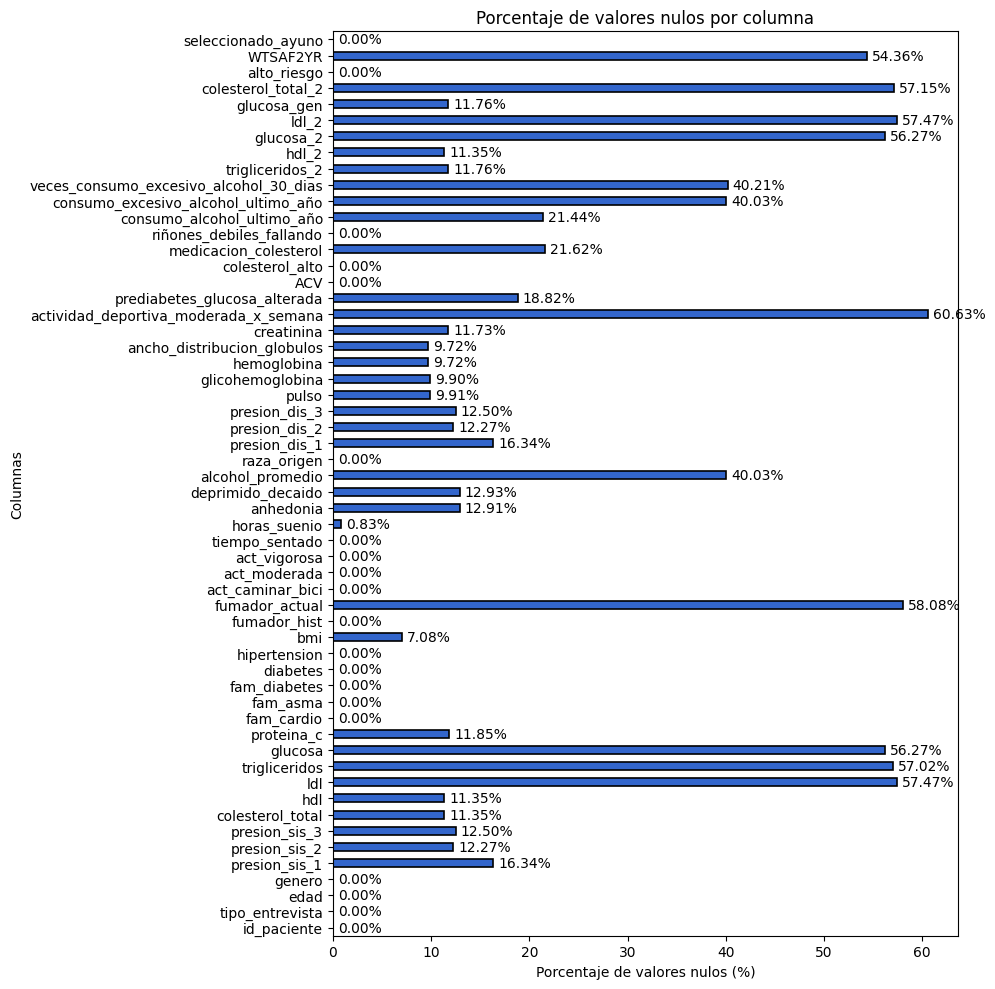

In [258]:
porcentaje_nulos = df_min.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [259]:
# short_names_dict = {
#     "SEQN": "id_paciente",
#     "RIDSTATR": "tipo_entrevista",
#     "RIDAGEYR": "edad",
#     "RIAGENDR": "genero",
#     "BPXSY1": "presion_sis_1",
#     "BPXSY2": "presion_sis_2",
#     "BPXSY3": "presion_sis_3",
#     "LBXTC": "colesterol_total",
#     "LBDHDD": "hdl",
#     "LBDLDL": "ldl",
#     "LBXTR": "trigliceridos",
#     "LBXGLU": "glucosa",
#     "LBXHSCRP": "proteina_c",
#     "MCQ300A": "fam_cardio",
#     "MCQ300B": "fam_asma",
#     "MCQ300C": "fam_diabetes",
#     "DIQ010": "diabetes",
#     "BPQ020": "hipertension",
#     "BMXBMI": "bmi",
#     "SMQ020": "fumador_hist",
#     "SMQ040": "fumador_actual",
#     "PAQ605": "act_caminar_bici",
#     "PAQ620": "act_moderada",
#     "PAQ635": "act_vigorosa",
#     "PAQ650": "tiempo_sentado",
#     "SLD012": "horas_suenio",
#     "DPQ010": "anhedonia",
#     "DPQ020": "deprimido_decaido",
#     # "DPQ030": "depresion_3",
#     # "DPQ040": "depresion_4",
#     # "DPQ050": "depresion_5",
#     # "DPQ060": "depresion_6",
#     # "DPQ070": "depresion_7",
#     # "DPQ080": "depresion_8",
#     # "DPQ090": "depresion_9",
#     "ALQ130": "alcohol_promedio",
#     # "DR1TSUGR": "azucar_total_dia",
#     "SMQ910": "consumo_actual_tab_sin_humo",
#     #
#     # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
#     "RIDRETH3": "raza_origen",
#     "BPXDI1" : "presion_dis_1",
#     "BPXDI2" : "presion_dis_2",
#     "BPXDI3" : "presion_dis_3",
#     "BPXPULS": "pulso", # numerica binaria
#     "LBXGH" :	"glicohemoglobina", # numerica
#     "LBXHGB":  "hemoglobina",
#     "LBXRDW": "ancho_distribucion_globulos",
#     "LBXSCR": "creatinina",
#     # "PAQ665": "actividad_deportiva moderada, sí/no)",
#     "PAQ670": "actividad_deportiva_moderada_x_semana",
#     "DIQ160": "prediabetes_glucosa_alterada",
#     "MCQ160F": "ACV",
#     "BPQ080": "colesterol_alto",
#     "BPQ090D": "medicacion_colesterol",
#     "KIQ022" : "riñones_debiles_fallando",
#     "ALQ121": "consumo_alcohol_ultimo_año",
#     "ALQ142": "consumo_excesivo_alcohol_ultimo_año",
#     "ALQ170": "veces_consumo_excesivo_alcohol_30_dias",
#     "LBDSTRSI": "trigliceridos_2",
#     "LBDHDDSI": "hdl_2",
#     "LBDGLUSI": "glucosa_2",
#     "LBDLDLSI":"ldl_2",
#     "LBXSGL": "glucosa_gen"
# }


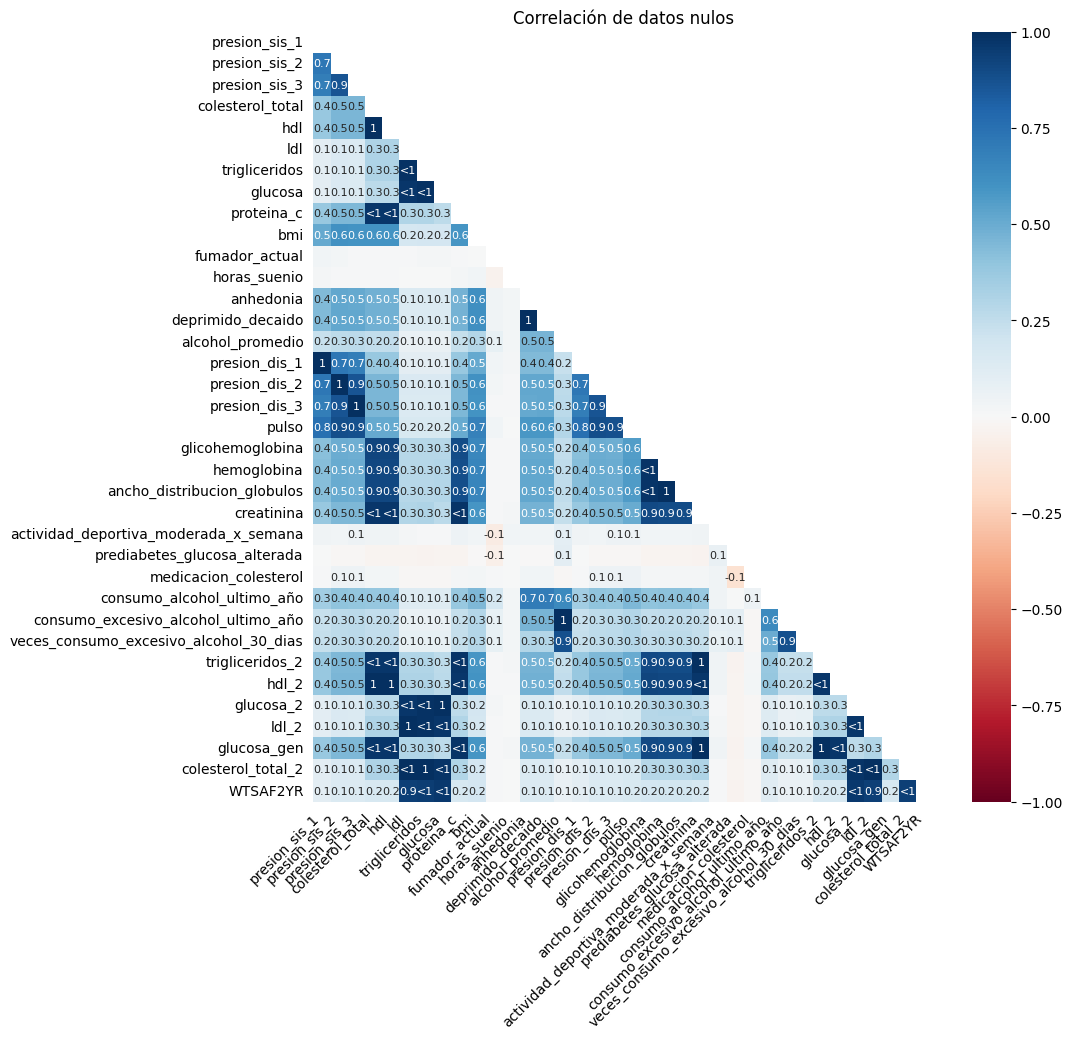

In [260]:
msno.heatmap(df_min, fontsize=10, figsize=(10,10))
plt.title("Correlación de datos nulos", fontsize=12)
plt.show()

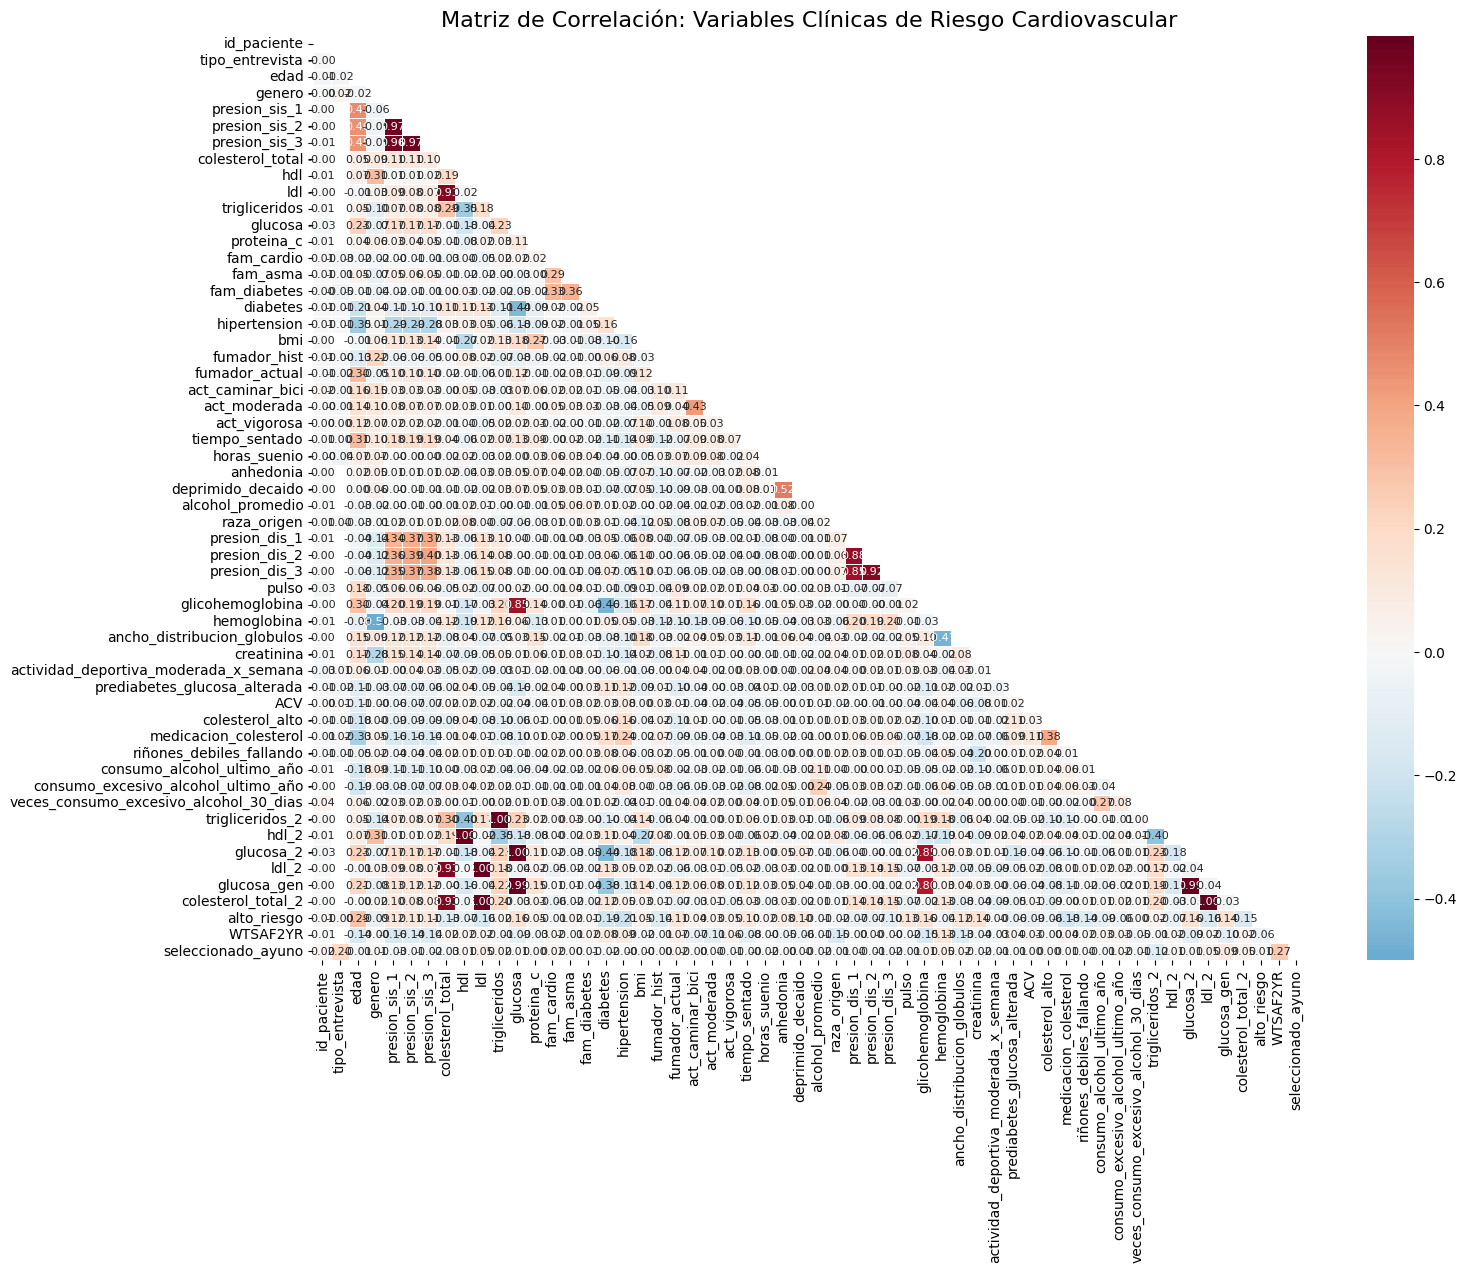

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculamos la matriz de correlación (usamos Spearman si hay variables no normales)
corr_matrix = df_min.corr(method='pearson')

# 2. Configuramos el tamaño de la figura
plt.figure(figsize=(16, 12))

# 3. Creamos un mapa de calor (Heatmap)
# Usamos una máscara para ver solo la mitad inferior (espejada) y que sea más legible
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,           # Muestra los números
            fmt=".2f",            # Dos decimales
            cmap='RdBu_r',        # Rojo para positiva, Azul para negativa
            center=0,
            linewidths=0.5,
            annot_kws={"size": 8}) # Tamaño de letra de los números

plt.title('Matriz de Correlación: Variables Clínicas de Riesgo Cardiovascular', fontsize=16)
plt.show()

Logicamente existe correlacción alta entre variables. Se analizará cuales finalmente quedan y cuales no.

In [262]:
df_min.columns

Index(['id_paciente', 'tipo_entrevista', 'edad', 'genero', 'presion_sis_1',
       'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl',
       'trigliceridos', 'glucosa', 'proteina_c', 'fam_cardio', 'fam_asma',
       'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist',
       'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa',
       'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido',
       'alcohol_promedio', 'raza_origen', 'presion_dis_1', 'presion_dis_2',
       'presion_dis_3', 'pulso', 'glicohemoglobina', 'hemoglobina',
       'ancho_distribucion_globulos', 'creatinina',
       'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada',
       'ACV', 'colesterol_alto', 'medicacion_colesterol',
       'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año',
       'consumo_excesivo_alcohol_ultimo_año',
       'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2',
       'glucosa_2', 'ldl_2

Guardo dataframe que contiene las variables a tener en cuenta

In [263]:
# Define la ruta y el nombre del archivo
ruta_guardado = '/content/drive/My Drive/NHANES/df_min.csv'

# Guardar el DataFrame
df_min.to_csv(ruta_guardado, index=False, encoding='utf-8')

print(f"Archivo guardado exitosamente en: {ruta_guardado}")

Archivo guardado exitosamente en: /content/drive/My Drive/NHANES/df_min.csv
